# Data Loading

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

energy_data = pd.read_csv('/content/drive/MyDrive/ODL_LAB/energy_dataset.csv')
weather_data = pd.read_csv('/content/drive/MyDrive/ODL_LAB/weather_features.csv')

Mounted at /content/drive


In [ ]:
print("Energy Data Columns:", energy_data.columns)
print("Weather Data Columns:", weather_data.columns)

Energy Data Columns: Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')
Weather Data Columns: Index(['dt_iso', 'city_

# Data Preprocessing

In [ ]:
# Convert weather datetime
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], utc=True)

# Rename for consistency
weather_data = weather_data.rename(columns={'dt_iso': 'time'})

In [ ]:
energy_data['time'] = pd.to_datetime(energy_data['time'], utc=True)
weather_data['time'] = pd.to_datetime(weather_data['time'], utc=True)

In [ ]:
# Drop text columns (they cannot be used in the model directly)
weather_data = weather_data.drop(columns=['city_name', 'weather_main', 'weather_description', 'weather_icon'])

In [ ]:
# Merge on time
merged_data = pd.merge(energy_data, weather_data, on='time', how='inner')

# Set index to time
merged_data = merged_data.set_index('time')

In [ ]:
merged_data = merged_data.interpolate(method='time')
merged_data = merged_data.fillna(method='ffill').fillna(method='bfill')

<ipython-input-7-60d396841266>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data = merged_data.fillna(method='ffill').fillna(method='bfill')


In [ ]:
merged_data

generation biomass  \
time                                            
2014-12-31 23:00:00+00:00               447.0   
2014-12-31 23:00:00+00:00               447.0   
2014-12-31 23:00:00+00:00               447.0   
2014-12-31 23:00:00+00:00               447.0   
2014-12-31 23:00:00+00:00               447.0   
...                                       ...   
2018-12-31 22:00:00+00:00               290.0   
2018-12-31 22:00:00+00:00               290.0   
2018-12-31 22:00:00+00:00               290.0   
2018-12-31 22:00:00+00:00               290.0   
2018-12-31 22:00:00+00:00               290.0   

                           generation fossil brown coal/lignite  \
time                                                              
2014-12-31 23:00:00+00:00                                 329.0   
2014-12-31 23:00:00+00:00                                 329.0   
2014-12-31 23:00:00+00:00                                 329.0   
2014-12-31 23:00:00+00:00                                 329.0   
2014-12-31 23:00:00+00:00                                 329.0   
...                                                         ...   
2018-12-31 22:00:00+00:00                                   0.0   
2018-12-31 22:00:00+00:00                                   0.0   
2018-12-31 22:00:00+00:00                                   0.0   
2018-12-31 22:00:00+00:00                                   0.0   
2018-12-31 22:00:00+00:00                                   0.0   

                           generation fossil coal-derived gas  \
time                                                            
2014-12-31 23:00:00+00:00                                 0.0   
2014-12-31 23:00:00+00:00                                 0.0   
2014-12-31 23:00:00+00:00                                 0.0   
2014-12-31 23:00:00+00:00                                 0.0   
2014-12-31 23:00:00+00:00                                 0.0   
...                                                       ...   
2018-12-31 22:00:00+00:00                                 0.0   
2018-12-31 22:00:00+00:00                                 0.0   
2018-12-31 22:00:00+00:00                                 0.0   
2018-12-31 22:00:00+00:00                                 0.0   
2018-12-31 22:00:00+00:00                                 0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2014-12-31 23:00:00+00:00                 4844.0                       4821.0   
2014-12-31 23:00:00+00:00                 4844.0                       4821.0   
2014-12-31 23:00:00+00:00                 4844.0                       4821.0   
2014-12-31 23:00:00+00:00                 4844.0                       4821.0   
2014-12-31 23:00:00+00:00                 4844.0                       4821.0   
...                                          ...                          ...   
2018-12-31 22:00:00+00:00                 6926.0                       2166.0   
2018-12-31 22:00:00+00:00                 6926.0                       2166.0   
2018-12-31 22:00:00+00:00                 6926.0                       2166.0   
2018-12-31 22:00:00+00:00                 6926.0                       2166.0   
2018-12-31 22:00:00+00:00                 6926.0                       2166.0   

                           generation fossil oil  generation fossil oil shale  \
time                                                                            
2014-12-31 23:00:00+00:00                  162.0                          0.0   
2014-12-31 23:00:00+00:00                  162.0                          0.0   
2014-12-31 23:00:00+00:00                  162.0                          0.0   
2014-12-31 23:00:00+00:00                  162.0                          0.0   
2014-12-31 23:00:00+00:00                  162.0                          0.0   
...                                          ...  

# Feature Engineering

In [ ]:
merged_data['hour'] = merged_data.index.hour
merged_data['weekday'] = merged_data.index.weekday
merged_data['month'] = merged_data.index.month
merged_data['is_peak_hour'] = merged_data['hour'].isin([6, 7, 8, 17, 18, 19]).astype(int)
merged_data['is_weekend'] = merged_data['weekday'].isin([5, 6]).astype(int)
merged_data['load_lag_1'] = merged_data['total load actual'].shift(1)
merged_data['load_lag_24'] = merged_data['total load actual'].shift(24)
merged_data['delta_load'] = merged_data['total load actual'].diff().fillna(0)

In [ ]:
import numpy as np
# Time encoding (captures cyclical patterns)
merged_data['hour_sin'] = np.sin(2 * np.pi * merged_data['hour'] / 24)
merged_data['hour_cos'] = np.cos(2 * np.pi * merged_data['hour'] / 24)
merged_data['weekday_sin'] = np.sin(2 * np.pi * merged_data['weekday'] / 7)
merged_data['weekday_cos'] = np.cos(2 * np.pi * merged_data['weekday'] / 7)

# Rolling statistics (captures trends and anomalies)
merged_data['rolling_mean_6'] = merged_data['total load actual'].rolling(6).mean()
merged_data['rolling_std_6'] = merged_data['total load actual'].rolling(6).std()
merged_data['lag_7'] = merged_data['total load actual'].shift(7)
merged_data['lag_168'] = merged_data['total load actual'].shift(168)

In [ ]:
import numpy as np

def compute_fft_energy(series, top_k=10):
    fft_vals = np.abs(np.fft.fft(series))[:len(series)//2]
    return np.sum(np.sort(fft_vals)[-top_k:])

# Apply FFT energy over a rolling window (e.g., 24-hour)
merged_data['fft_energy'] = merged_data['total load actual'].rolling(window=24).apply(compute_fft_energy, raw=True)

# EDA

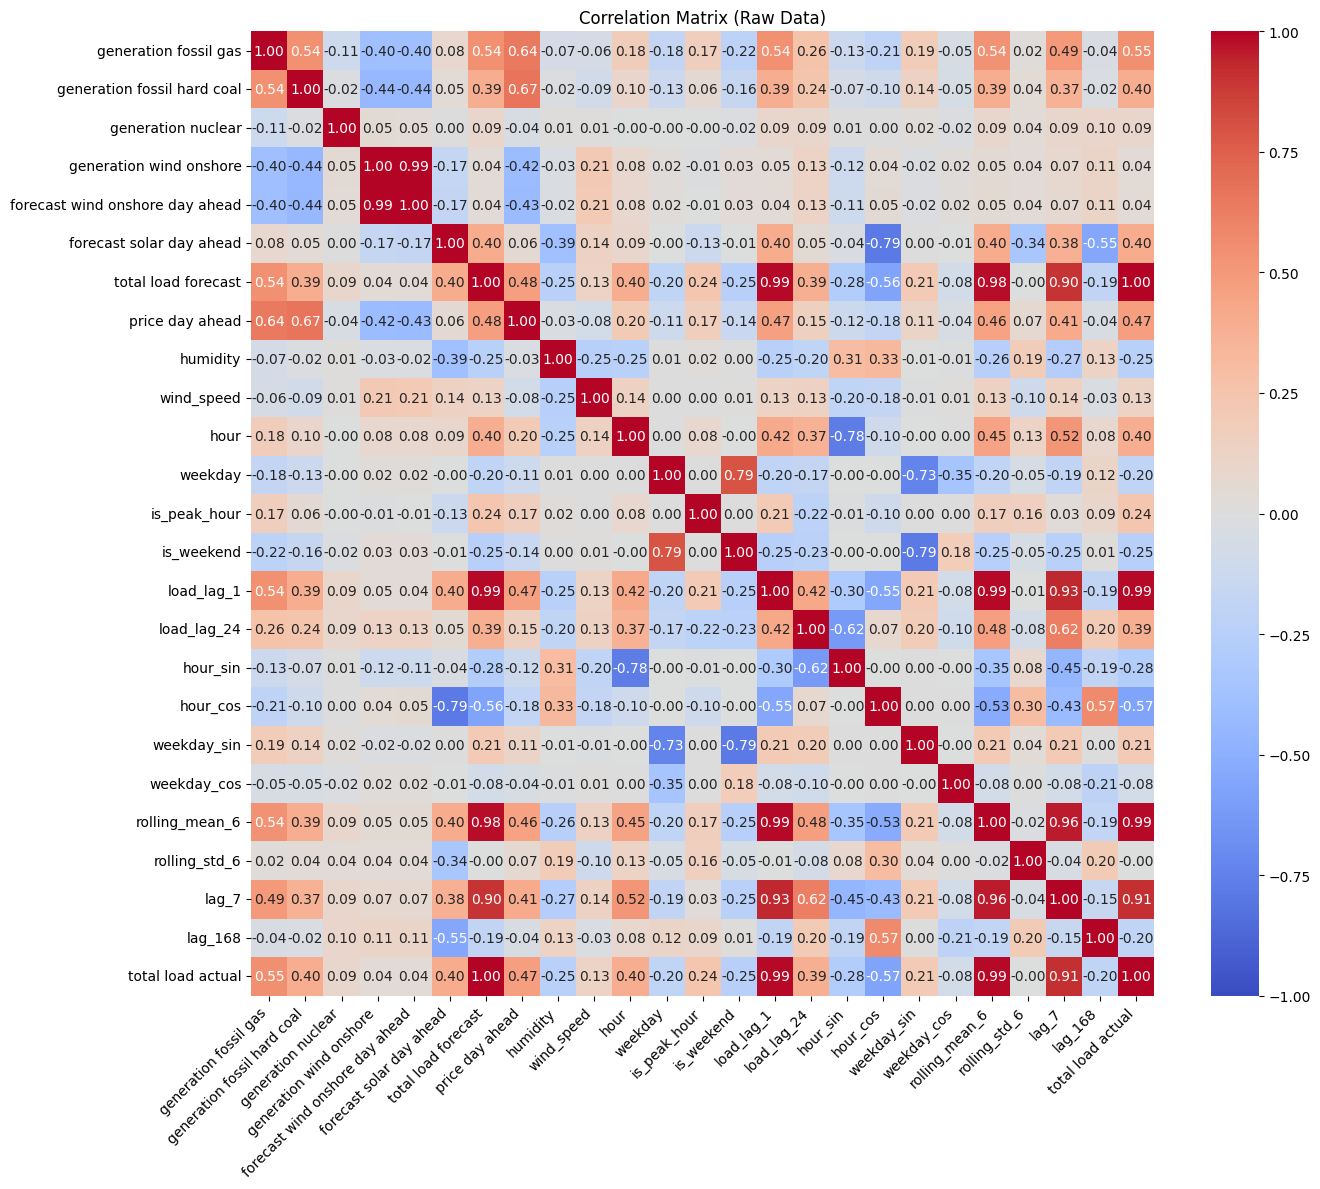

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use unscaled data for better correlation visibility
features_for_corr = selected_features + ['total load actual']
corr_matrix = merged_data[features_for_corr].dropna().corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Raw Data)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

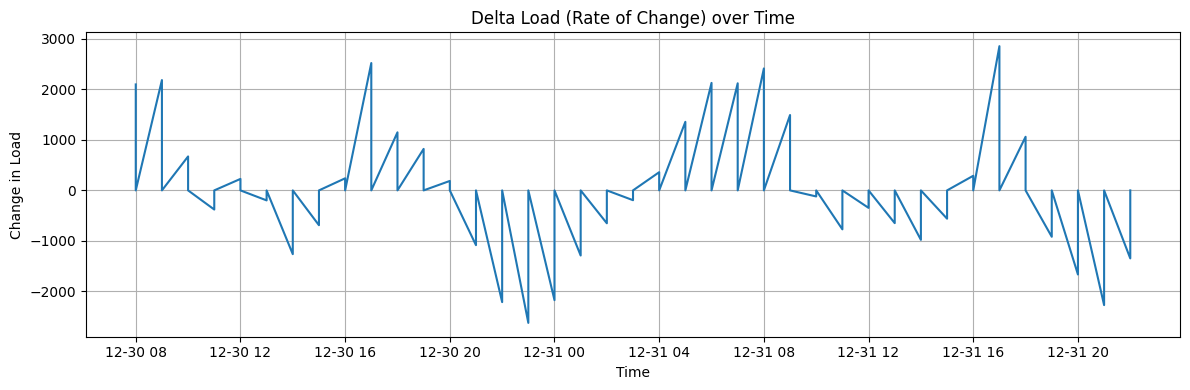

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(merged_data.index[-200:], merged_data['delta_load'][-200:])
plt.title("Delta Load (Rate of Change) over Time")
plt.xlabel("Time")
plt.ylabel("Change in Load")
plt.grid(True)
plt.tight_layout()
plt.show()

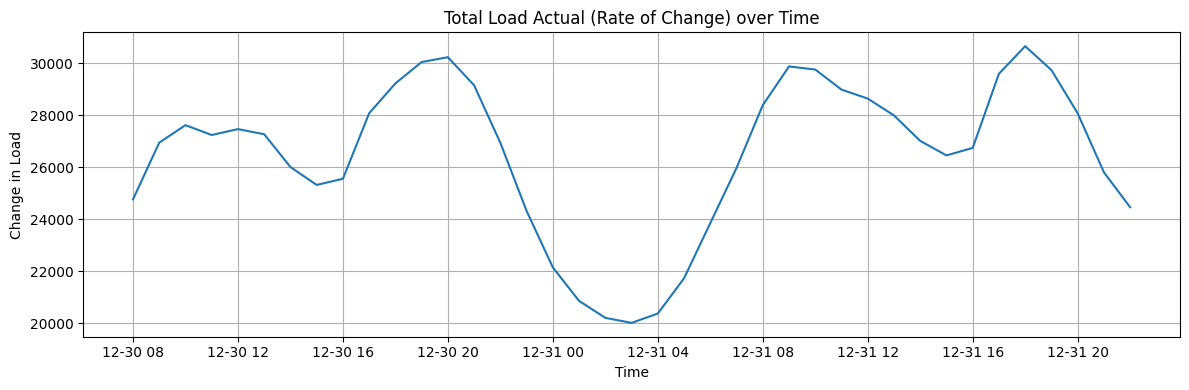

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(merged_data.index[-200:], merged_data['total load actual'][-200:])
plt.title("Total Load Actual (Rate of Change) over Time")
plt.xlabel("Time")
plt.ylabel("Change in Load")
plt.grid(True)
plt.tight_layout()
plt.show()

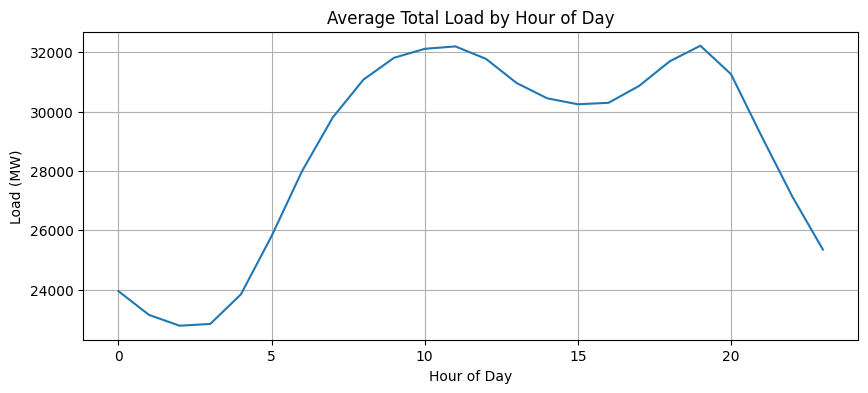

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

hourly_avg = merged_data.groupby('hour')['total load actual'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly_avg, x='hour', y='total load actual')
plt.title("Average Total Load by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Load (MW)")
plt.grid(True)
plt.show()

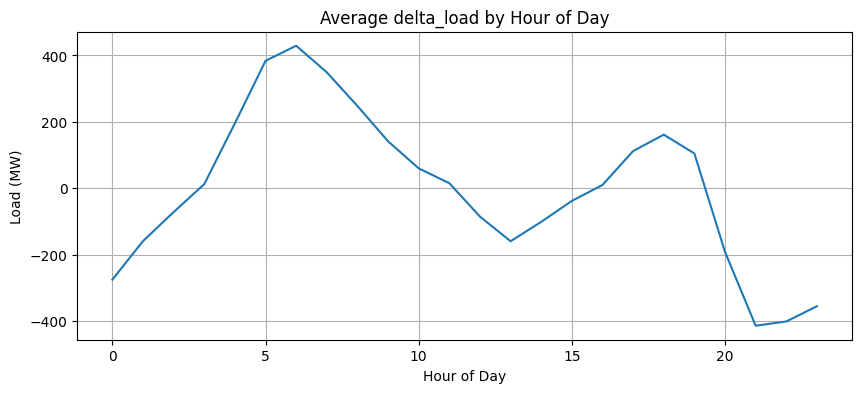

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

hourly_avg = merged_data.groupby('hour')['delta_load'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly_avg, x='hour', y='delta_load')
plt.title("Average delta_load by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Load (MW)")
plt.grid(True)
plt.show()

<ipython-input-16-9a1af863a223>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_avg, x='weekday', y='total load actual', palette='viridis')


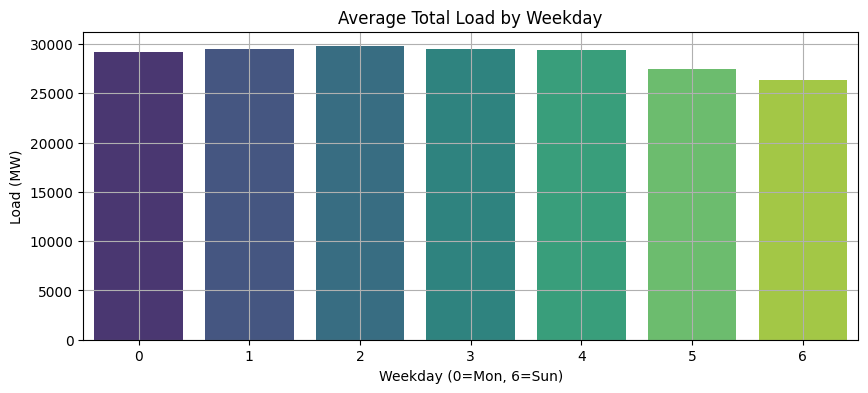

In [ ]:
weekday_avg = merged_data.groupby('weekday')['total load actual'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=weekday_avg, x='weekday', y='total load actual', palette='viridis')
plt.title("Average Total Load by Weekday")
plt.xlabel("Weekday (0=Mon, 6=Sun)")
plt.ylabel("Load (MW)")
plt.grid(True)
plt.show()

<ipython-input-18-118784f59342>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_avg, x='weekday', y='delta_load', palette='viridis')


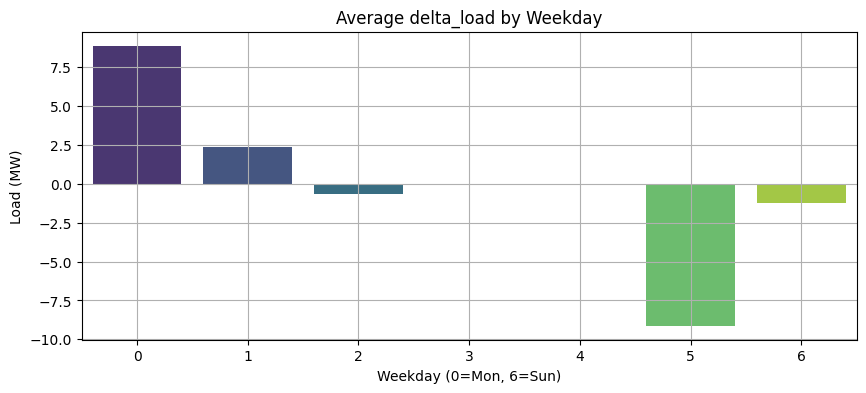

In [ ]:
weekday_avg = merged_data.groupby('weekday')['delta_load'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=weekday_avg, x='weekday', y='delta_load', palette='viridis')
plt.title("Average delta_load by Weekday")
plt.xlabel("Weekday (0=Mon, 6=Sun)")
plt.ylabel("Load (MW)")
plt.grid(True)
plt.show()

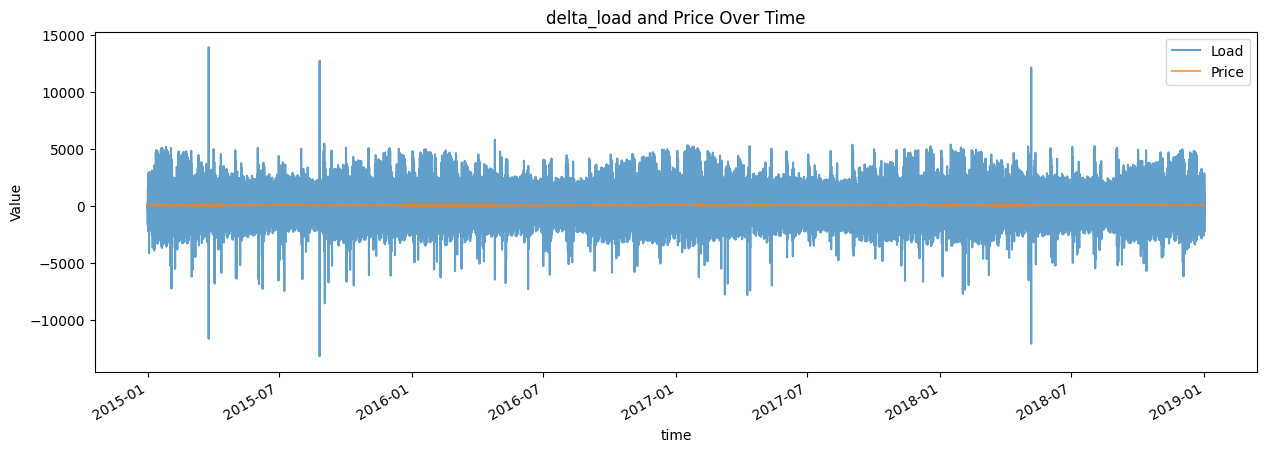

In [ ]:
plt.figure(figsize=(15, 5))
merged_data['delta_load'].plot(label='Load', alpha=0.7)
merged_data['price actual'].plot(label='Price', alpha=0.7)
plt.title("delta_load and Price Over Time")
plt.ylabel("Value")
plt.legend()
plt.show()

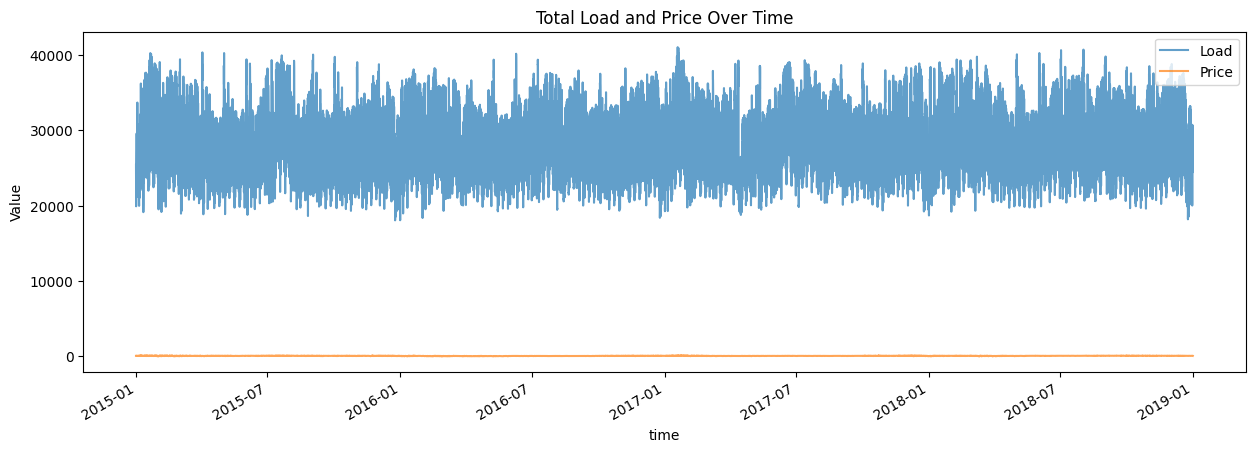

In [ ]:
plt.figure(figsize=(15, 5))
merged_data['total load actual'].plot(label='Load', alpha=0.7)
merged_data['price actual'].plot(label='Price', alpha=0.7)
plt.title("Total Load and Price Over Time")
plt.ylabel("Value")
plt.legend()
plt.show()

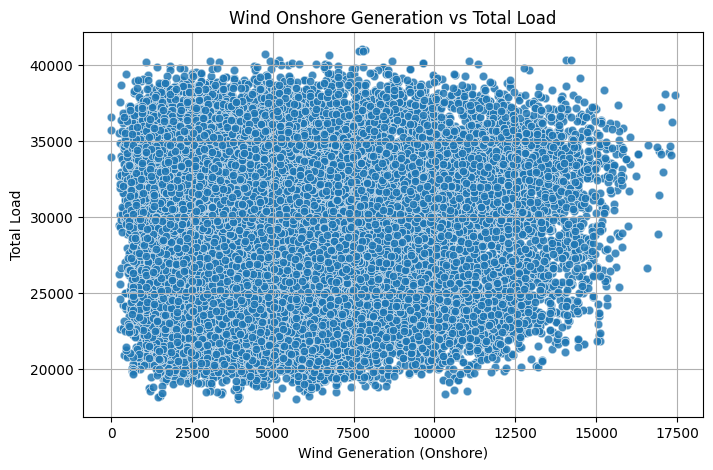

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='generation wind onshore', y='total load actual', alpha=0.3)
plt.title("Wind Onshore Generation vs Total Load")
plt.xlabel("Wind Generation (Onshore)")
plt.ylabel("Total Load")
plt.grid(True)
plt.show()

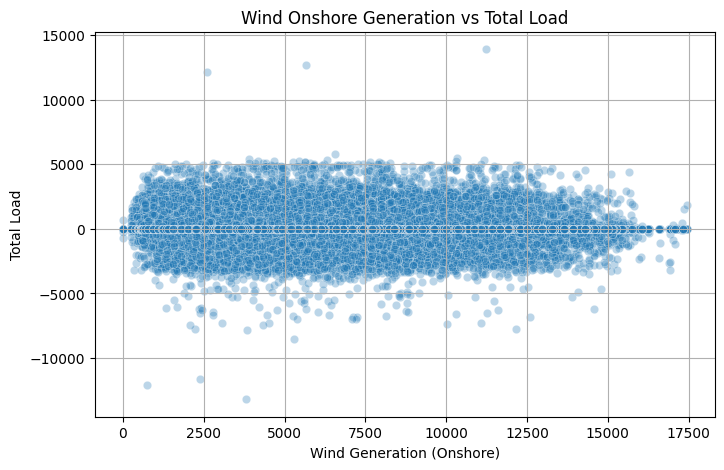

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='generation wind onshore', y='delta_load', alpha=0.3)
plt.title("Wind Onshore Generation vs Total Load")
plt.xlabel("Wind Generation (Onshore)")
plt.ylabel("Total Load")
plt.grid(True)
plt.show()

# Feature Selection

In [ ]:
selected_features = [
    'generation fossil gas', 'generation fossil hard coal', 'generation nuclear',
    'generation wind onshore', 'forecast wind onshore day ahead', 'forecast solar day ahead',
    'total load forecast', 'price day ahead', 'humidity', 'wind_speed',
    'hour', 'weekday', 'is_peak_hour', 'is_weekend', 'load_lag_1', 'load_lag_24',
    'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'rolling_mean_6', 'rolling_std_6',
    'lag_7', 'lag_168'
]

target_column = 'delta_load'

df_model = merged_data[selected_features + [target_column]]

In [ ]:
# Normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_model)

# Data Splitting

In [ ]:

import numpy as np

window_size = 30         # Input past 30 hours
forecast_horizon = 24     # Predict next 24 hours

X, y = [], []

for i in range(len(scaled_data) - window_size - forecast_horizon + 1):
    X.append(scaled_data[i : i + window_size, :-1]) # input: 30 time steps, all features except target
    y.append(scaled_data[i + window_size : i + window_size + forecast_horizon, -1]) # output: 24 time steps of target

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (178343, 30, 24)
y shape: (178343, 24)


X: past 30 hours of input features

y: next 24 hours of the target variable (for forecasting)

In [ ]:
print("Any NaNs in X:", np.isnan(X).any())
print("Any NaNs in y:", np.isnan(y).any())

Any NaNs in X: True
Any NaNs in y: False


In [ ]:
valid_idx = ~np.isnan(X).any(axis=(1, 2)) & ~np.isnan(y).any(axis=1)
X = X[valid_idx]
y = y[valid_idx]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# 80% train+val, 20% test (keep order)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 25% of train set = validation (so final = 60% train, 20% val, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=False)

# **Model Building - LSTM**

# 4.1.1.1 Basic LSTM Model Architecture (delta_load - 24 Hours)


---



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(16))
model.add(Dropout(0.2))

model.add(Dense(forecast_horizon))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        22,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,744 (151.34 KB)

 Trainable params: 38,744 (151.34 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0325 - mae: 0.1178 - val_loss: 5.4554e-04 - val_mae: 0.0119
Epoch 2/20
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0014 - mae: 0.0281 - val_loss: 5.3159e-04 - val_mae: 0.0115
Epoch 3/20
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 6.0581e-04 - mae: 0.0148 - val_loss: 5.2331e-04 - val_mae: 0.0118
Epoch 4/20
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 5.0553e-04 - mae: 0.0117 - val_loss: 5.0748e-04 - val_mae: 0.0120
Epoch 5/20
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 4.8954e-04 - mae: 0.0119 - val_loss: 5.0176e-04 - val_mae: 0.0122
Epoch 6/20
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 4.8661e-04 - mae: 0.0121 - val_loss: 4.9776e-04 - val_mae: 0.0121
Epoch 7/20
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 4.8147e-04 - mae: 0.0122 - val_loss: 4.9605e-04 - val_mae: 0.0126
Epoch 8/20
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 4.7742e-04 - mae: 0.0122 - val_los

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

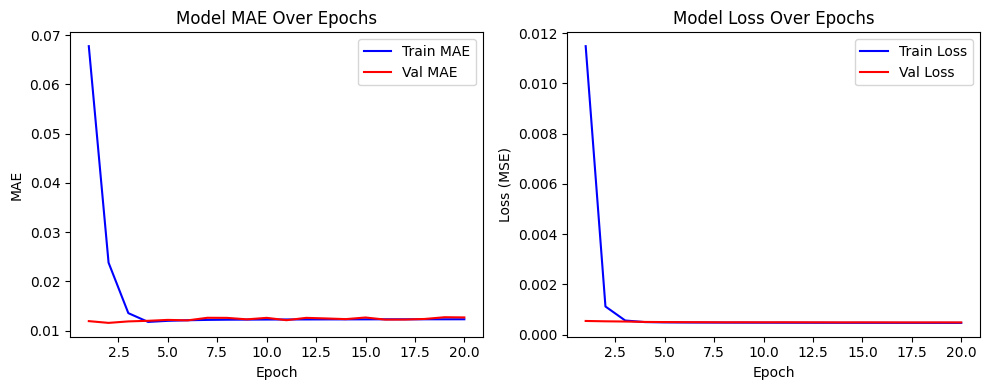

Test Loss (MSE): 0.0004
Test MAE: 0.0120


In [ ]:
epochs = range(1, len(mae) + 1)

# Plot MAE and Loss
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Model MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Model Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


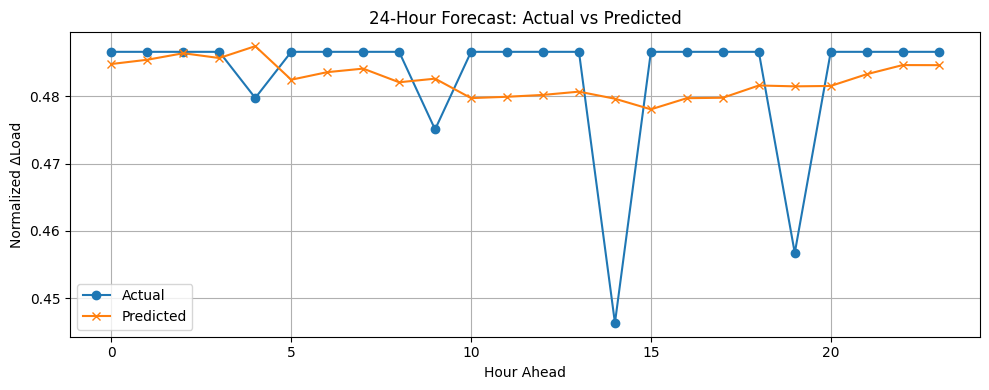

In [ ]:
# Overlay Line Plot (Predicted vs Actual)
# See how well the model follows the actual signal
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 4))
plt.plot(range(24), y_test[0], label='Actual', marker='o')
plt.plot(range(24), y_pred[0], label='Predicted', marker='x')
plt.title("24-Hour Forecast: Actual vs Predicted")
plt.xlabel("Hour Ahead")
plt.ylabel("Normalized ΔLoad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


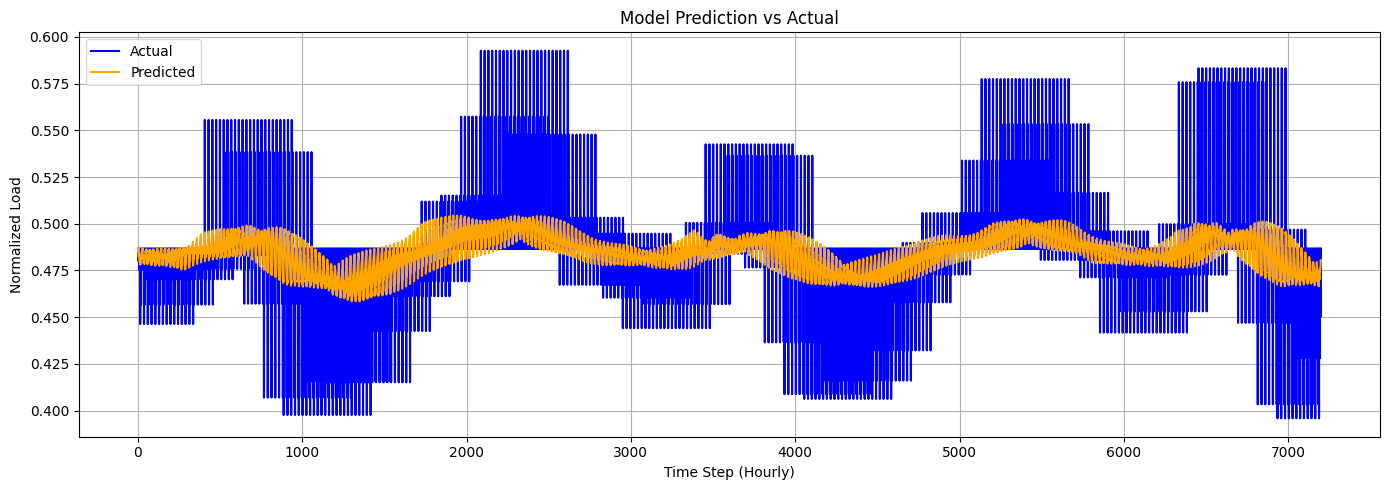

In [ ]:
# Overlay Line Plot (Predicted vs Actual)
# See how well the model follows the actual signal
y_pred = model.predict(X_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test[:300].flatten(), label='Actual', color='blue')
plt.plot(y_pred[:300].flatten(), label='Predicted', color='orange')
plt.title("Model Prediction vs Actual")
plt.xlabel("Time Step (Hourly)")
plt.ylabel("Normalized Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Trend Direction Accuracy
# See if the model gets the up/down direction right
import numpy as np

actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred.flatten())

trend_match = np.sign(actual_diff) == np.sign(pred_diff)
accuracy = np.mean(trend_match)

print(f"Trend Direction Accuracy: {accuracy:.2%}")

Trend Direction Accuracy: 20.17%


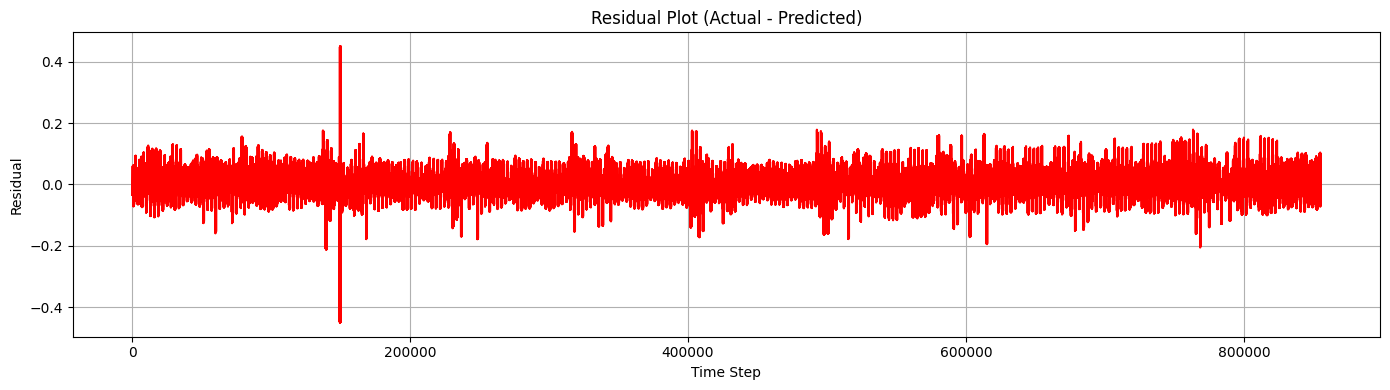

In [ ]:
# Residual Plot
# Check if the model error is biased (over/under-predict)
residuals = y_test.flatten() - y_pred.flatten()

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

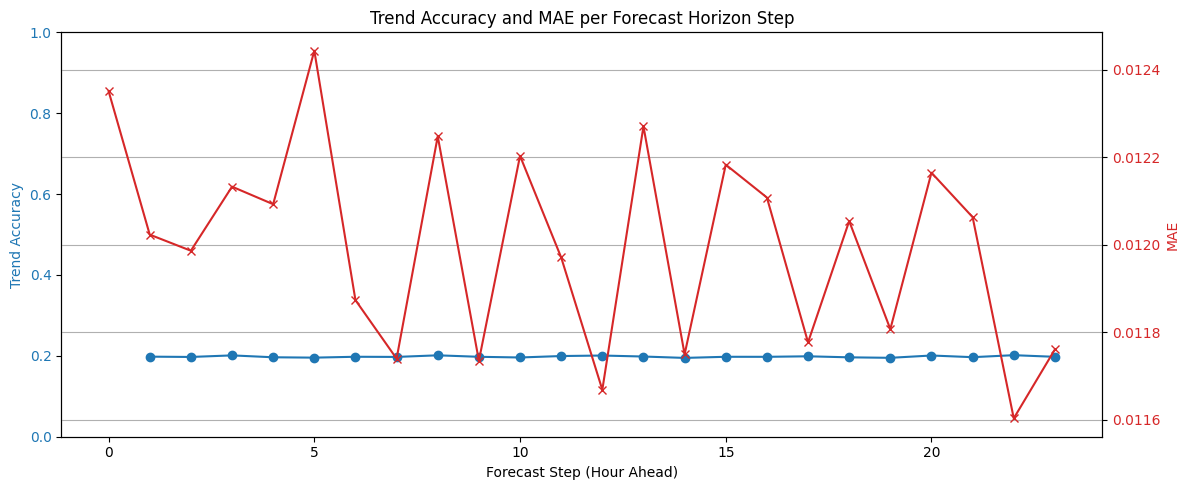

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Calculate Trend Accuracy per Forecast Step ---
trend_accuracies = []

for i in range(1, 24):  # From step 1 to 23 (we skip step 0 due to no previous value)
    actual_trend = np.sign(y_test[:, i] - y_test[:, i - 1])
    pred_trend = np.sign(y_pred[:, i] - y_pred[:, i - 1])
    accuracy = np.mean(actual_trend == pred_trend)
    trend_accuracies.append(accuracy)

# --- Calculate MAE per Forecast Step ---
mae_per_step = np.mean(np.abs(y_test - y_pred), axis=0)

# --- Plot Trend Accuracy and MAE ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Trend Accuracy
color = 'tab:blue'
ax1.set_xlabel('Forecast Step (Hour Ahead)')
ax1.set_ylabel('Trend Accuracy', color=color)
ax1.plot(range(1, 24), trend_accuracies, color=color, marker='o', label='Trend Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)

# Plot MAE (Right Y-axis)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MAE', color=color)
ax2.plot(range(24), mae_per_step, color=color, marker='x', label='MAE')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Trend Accuracy and MAE per Forecast Horizon Step")
plt.grid(True)
plt.tight_layout()
plt.show()

Loss/MAE convergence	✅ Good	No overfitting, stable training
Test MAE/MSE	⚠️ Moderate	Acceptable, but worse than tuned models
24-hr Forecast Accuracy	⚠️ Partial match	General trend okay, lacks peak sharpness
Trend Direction Accuracy	❌ Very Low (20%)	Model not capturing load direction change well
Residuals	⚠️ Acceptable	Non-uniform errors, some spikes
MAE Stability	✅ Consistent	Reliable prediction, but not directionally aware

 Model 1: Basic 3-Layer LSTM
MAE: 0.0123

Trend Direction Accuracy: 20.17%

Strength: smooth learning, stable MAE

Weakness: poor at predicting short-term trend direction

# 4.1.1.2 LSTM + Attention Model (delta_load - 24 hours)


---



In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Attention, Concatenate

input_layer = Input(shape=(X.shape[1], X.shape[2]))

x = LSTM(64, return_sequences=True)(input_layer)
x = Dropout(0.2)(x)

attn = Attention()([x, x])
x = Concatenate()([x, attn])

x = LSTM(32)(x)
x = Dropout(0.2)(x)

output = Dense(forecast_horizon)(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 30, 19)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 30, 64)    │     21,504 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 30, 64)    │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 30, 64)    │          0 │ dropout[0][0],    │
│ (Attention)         │                   │            │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 30, 128)   │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │     20,608 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 24)        │        792 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 42,904 (167.59 KB)

 Trainable params: 42,904 (167.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - loss: 0.0145 - mae: 0.0773 - val_loss: 5.2157e-04 - val_mae: 0.0122
Epoch 2/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - loss: 7.8767e-04 - mae: 0.0189 - val_loss: 5.0019e-04 - val_mae: 0.0115
Epoch 3/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - loss: 5.0463e-04 - mae: 0.0120 - val_loss: 4.8971e-04 - val_mae: 0.0118
Epoch 4/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - loss: 4.8390e-04 - mae: 0.0119 - val_loss: 4.8457e-04 - val_mae: 0.0126
Epoch 5/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - loss: 4.7904e-04 - mae: 0.0120 - val_loss: 4.8387e-04 - val_mae: 0.0129
Epoch 6/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 87s 44ms/step - loss: 4.7682e-04 - mae: 0.0121 - val_loss: 4.8096e-04 - val_mae: 0.0127
Epoch 7/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 74s 42ms/step - loss: 4.7534e-04 - mae: 0.0122 - val_loss: 4.7869e-04 - val_mae: 0.0125
Epoch 8/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - loss: 4.7170e-04 - mae: 0.0122 - val

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

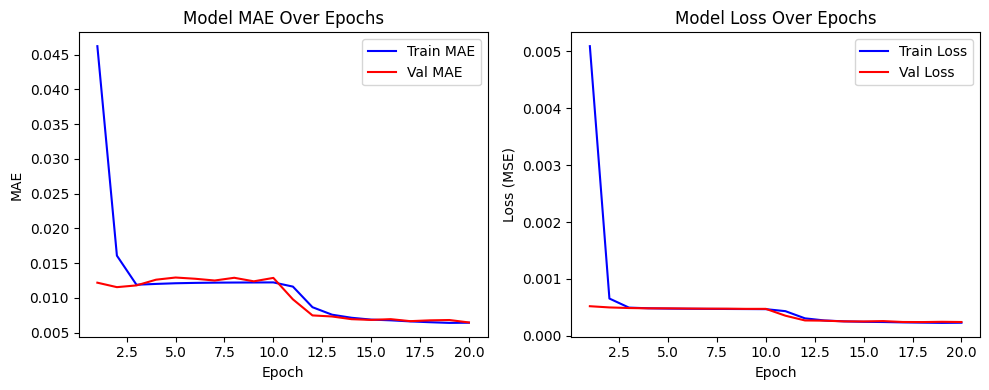

Test Loss (MSE): 0.0002
Test MAE: 0.0066


In [ ]:
epochs = range(1, len(mae) + 1)

# Plot MAE and Loss
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Model MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Model Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

1115/1115 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step


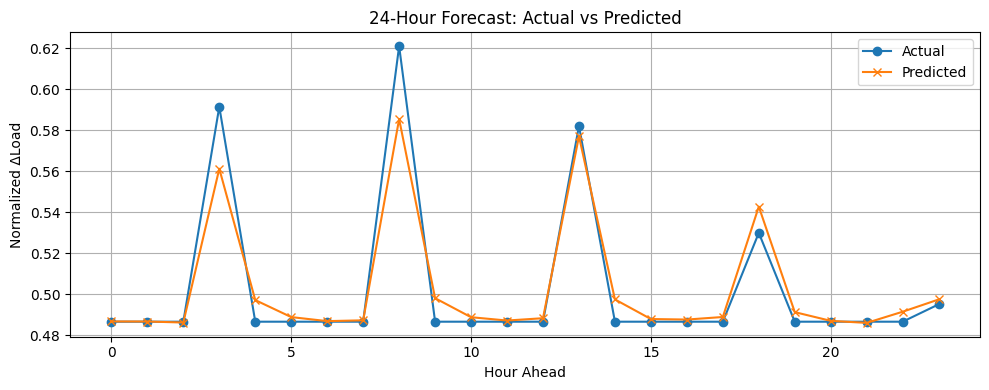

In [ ]:
# Overlay Line Plot (Predicted vs Actual)
# See how well the model follows the actual signal
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 4))
plt.plot(range(24), y_test[0], label='Actual', marker='o')
plt.plot(range(24), y_pred[0], label='Predicted', marker='x')
plt.title("24-Hour Forecast: Actual vs Predicted")
plt.xlabel("Hour Ahead")
plt.ylabel("Normalized ΔLoad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

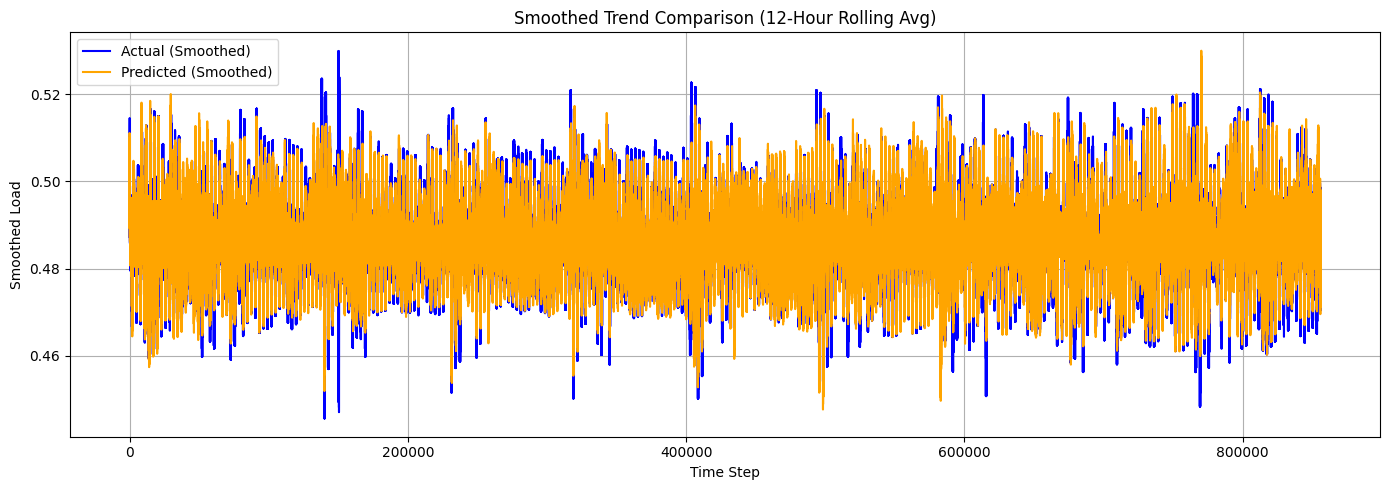

In [ ]:
# Smoothed Trends
# Visualize broader patterns, ignore noise
import pandas as pd

actual_smooth = pd.Series(y_test.flatten()).rolling(12).mean()
pred_smooth = pd.Series(y_pred.flatten()).rolling(12).mean()

plt.figure(figsize=(14, 5))
plt.plot(actual_smooth, label='Actual (Smoothed)', color='blue')
plt.plot(pred_smooth, label='Predicted (Smoothed)', color='orange')
plt.title("Smoothed Trend Comparison (12-Hour Rolling Avg)")
plt.xlabel("Time Step")
plt.ylabel("Smoothed Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Trend Direction Accuracy
# See if the model gets the up/down direction right
import numpy as np

actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred.flatten())

trend_match = np.sign(actual_diff) == np.sign(pred_diff)
accuracy = np.mean(trend_match)

print(f"Trend Direction Accuracy: {accuracy:.2%}")

Trend Direction Accuracy: 31.01%


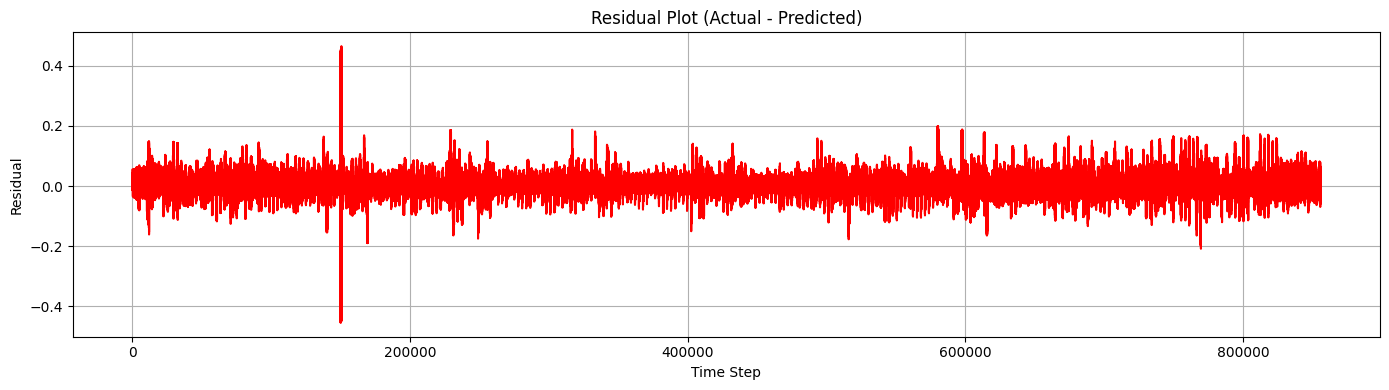

In [ ]:
# Residual Plot
# Check if the model error is biased (over/under-predict)
residuals = y_test.flatten() - y_pred.flatten()

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-38-5aac9f67bf37>:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


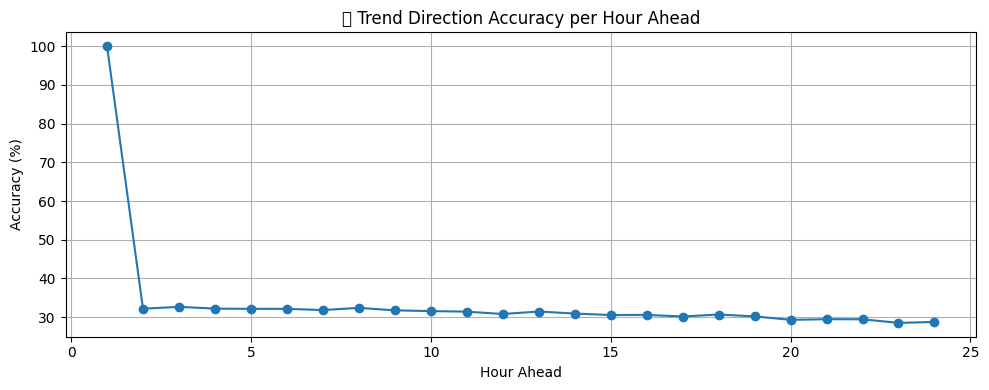

In [ ]:
step_accuracies = []
for i in range(y_test.shape[1]):
    actual_step_diff = np.sign(y_test[:, i] - y_test[:, i-1]) if i > 0 else np.sign(y_test[:, i])
    pred_step_diff = np.sign(y_pred[:, i] - y_pred[:, i-1]) if i > 0 else np.sign(y_pred[:, i])
    acc = np.mean(actual_step_diff == pred_step_diff)
    step_accuracies.append(acc)

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(range(1, len(step_accuracies)+1), np.array(step_accuracies) * 100, marker='o')
plt.title("📈 Trend Direction Accuracy per Hour Ahead")
plt.xlabel("Hour Ahead")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

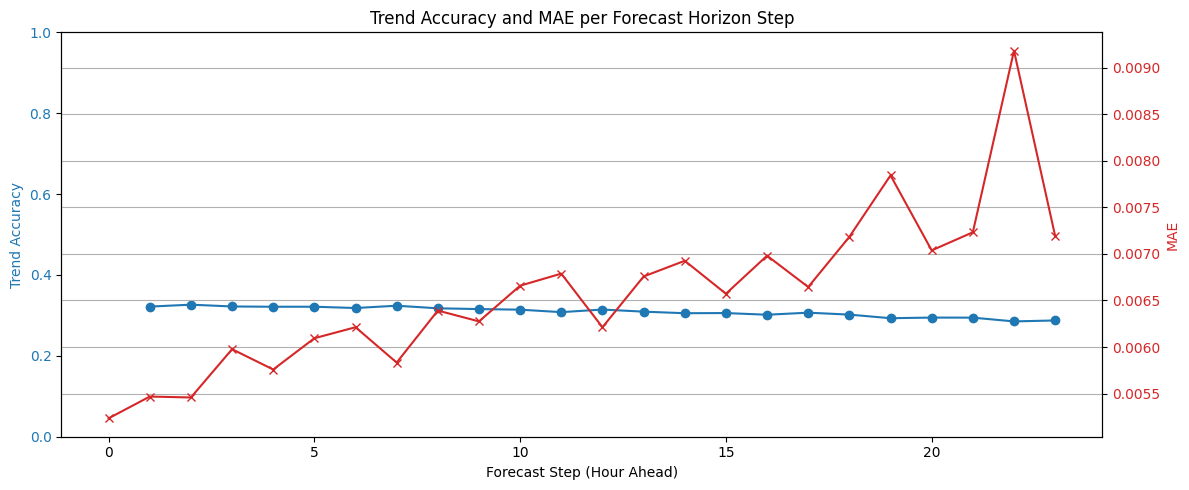

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Calculate Trend Accuracy per Forecast Step ---
trend_accuracies = []

for i in range(1, 24):  # From step 1 to 23 (we skip step 0 due to no previous value)
    actual_trend = np.sign(y_test[:, i] - y_test[:, i - 1])
    pred_trend = np.sign(y_pred[:, i] - y_pred[:, i - 1])
    accuracy = np.mean(actual_trend == pred_trend)
    trend_accuracies.append(accuracy)

# --- Calculate MAE per Forecast Step ---
mae_per_step = np.mean(np.abs(y_test - y_pred), axis=0)

# --- Plot Trend Accuracy and MAE ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Trend Accuracy
color = 'tab:blue'
ax1.set_xlabel('Forecast Step (Hour Ahead)')
ax1.set_ylabel('Trend Accuracy', color=color)
ax1.plot(range(1, 24), trend_accuracies, color=color, marker='o', label='Trend Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)

# Plot MAE (Right Y-axis)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MAE', color=color)
ax2.plot(range(24), mae_per_step, color=color, marker='x', label='MAE')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Trend Accuracy and MAE per Forecast Horizon Step")
plt.grid(True)
plt.tight_layout()
plt.show()

Model Fit	✅ Excellent convergence and generalization
Pattern Capture	✅ Daily patterns and seasonality are modeled
Trend Change Sensitivity	⚠️ Still weak — needs improvement in direction
Forecast Range	✅ 24-hour multi-step sequence handled well
Residual Behavior	✅ Clean and mostly noise-centered

# 4.1.1.3 Multi-Task 3-Layer LSTM Model (delta_load - 24 hours)


---



In [ ]:
# y shape: (samples, 24)
y_trend = (np.diff(y, axis=1) > 0).astype(int)  # (samples, 23)

# Pad to match 24 steps
y_trend = np.concatenate([y_trend, y_trend[:, -1:]], axis=1)

In [ ]:
# split train+val vs test (80% / 20%)
y_trend_temp, y_trend_test = train_test_split(y_trend, test_size=0.2, shuffle=False)

# split train vs val (60% / 20%)
y_trend_train, y_trend_val = train_test_split(y_trend_temp, test_size=0.25, shuffle=False)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

# Input shape: (timesteps, features)
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# LSTM Block 1
x = LSTM(64, return_sequences=True)(input_layer)
x = Dropout(0.2)(x)

# LSTM Block 2
x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.2)(x)

# LSTM Block 3
x = LSTM(16)(x)
x = Dropout(0.2)(x)

# Main output: ΔLoad regression (multi-step forecast)
load_output = Dense(forecast_horizon, name='load_output')(x)

# Trend direction classification (sigmoid for binary)
trend_output = Dense(forecast_horizon, activation='sigmoid', name='trend_output')(x)

# Define and compile model
model = Model(inputs=input_layer, outputs=[load_output, trend_output])

model.compile(
    optimizer='adam',
    loss={'load_output': 'mse', 'trend_output': 'binary_crossentropy'},
    metrics={'load_output': 'mae', 'trend_output': 'accuracy'}
)

In [ ]:
history = model.fit(
    X_train,
    {'load_output': y_train, 'trend_output': y_trend_train},
    validation_data=(X_val, {'load_output': y_val, 'trend_output': y_trend_val}),
    epochs=30,
    batch_size=64,
    verbose=1
)

Epoch 1/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - load_output_loss: 0.0283 - load_output_mae: 0.1166 - loss: 0.5578 - trend_output_accuracy: 0.0201 - trend_output_loss: 0.5294 - val_load_output_loss: 5.0947e-04 - val_load_output_mae: 0.0102 - val_loss: 0.4940 - val_trend_output_accuracy: 2.2450e-04 - val_trend_output_loss: 0.4935
Epoch 2/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - load_output_loss: 0.0014 - load_output_mae: 0.0274 - loss: 0.5004 - trend_output_accuracy: 0.0322 - trend_output_loss: 0.4990 - val_load_output_loss: 5.0446e-04 - val_load_output_mae: 0.0096 - val_loss: 0.4939 - val_trend_output_accuracy: 0.0296 - val_trend_output_loss: 0.4934
Epoch 3/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - load_output_loss: 6.3935e-04 - load_output_mae: 0.0145 - loss: 0.4985 - trend_output_accuracy: 0.0440 - trend_output_loss: 0.4979 - val_load_output_loss: 5.0001e-04 - val_load_output_mae: 0.0095 - val_loss: 0.4938 - val_trend_output_accuracy: 0.0298 - val_trend_outp

In [ ]:
results = model.evaluate(
    X_test,
    {'load_output': y_test, 'trend_output': y_trend_test},
    verbose=1
)

print("Test MSE (delta_load):", results[1])
print("Test MAE:", results[3])
print("Test Trend Accuracy:", results[4])

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - load_output_loss: 4.2772e-04 - load_output_mae: 0.0104 - loss: 0.2958 - trend_output_accuracy: 0.2143 - trend_output_loss: 0.2954
Test MSE (delta_load): 0.0004263256269041449
Test MAE: 0.01026662066578865
Test Trend Accuracy: 0.2226182073354721


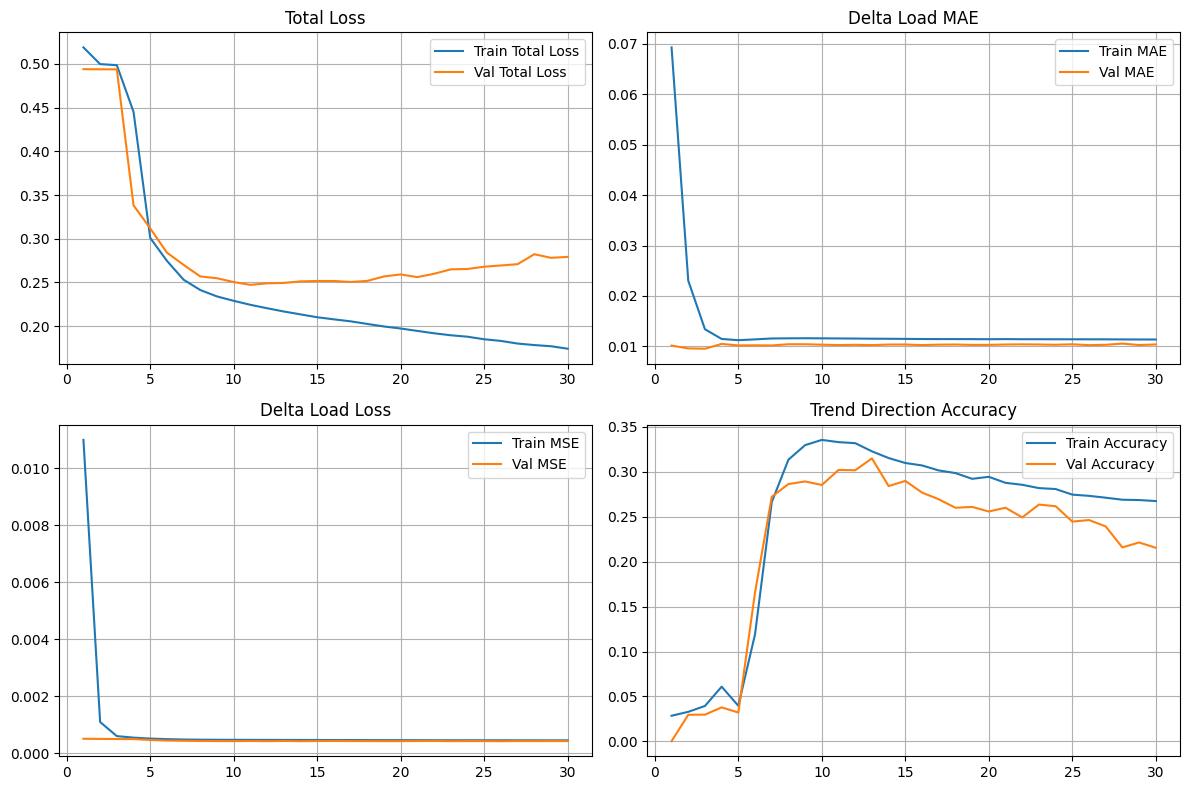

In [ ]:
# Extract losses and metrics from the history
loss = history.history['loss']                    # total loss
val_loss = history.history['val_loss']            # total val loss

load_loss = history.history['load_output_loss']   # regression loss
val_load_loss = history.history['val_load_output_loss']

trend_loss = history.history['trend_output_loss'] # classification loss
val_trend_loss = history.history['val_trend_output_loss']

load_mae = history.history['load_output_mae']
val_load_mae = history.history['val_load_output_mae']

trend_acc = history.history['trend_output_accuracy']
val_trend_acc = history.history['val_trend_output_accuracy']

epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Total Loss
axs[0, 0].plot(epochs, loss, label='Train Total Loss')
axs[0, 0].plot(epochs, val_loss, label='Val Total Loss')
axs[0, 0].set_title('Total Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Regression MAE
axs[0, 1].plot(epochs, load_mae, label='Train MAE')
axs[0, 1].plot(epochs, val_load_mae, label='Val MAE')
axs[0, 1].set_title('Delta Load MAE')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Regression Loss (MSE)
axs[1, 0].plot(epochs, load_loss, label='Train MSE')
axs[1, 0].plot(epochs, val_load_loss, label='Val MSE')
axs[1, 0].set_title('Delta Load Loss')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Trend Classification Accuracy
axs[1, 1].plot(epochs, trend_acc, label='Train Accuracy')
axs[1, 1].plot(epochs, val_trend_acc, label='Val Accuracy')
axs[1, 1].set_title('Trend Direction Accuracy')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

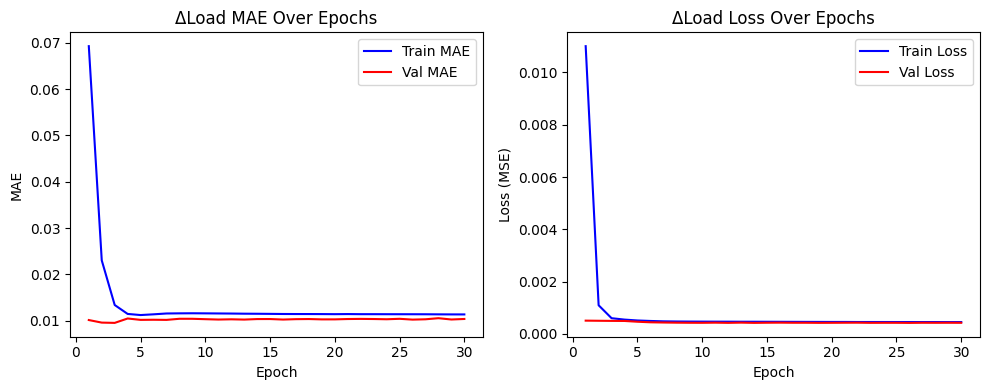

In [ ]:
# Extract correct history keys for ΔLoad prediction
mae = history.history['load_output_mae']
val_mae = history.history['val_load_output_mae']
loss = history.history['load_output_loss']
val_loss = history.history['val_load_output_loss']

epochs = range(1, len(mae) + 1)

# Plot MAE and Loss
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('ΔLoad MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('ΔLoad Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


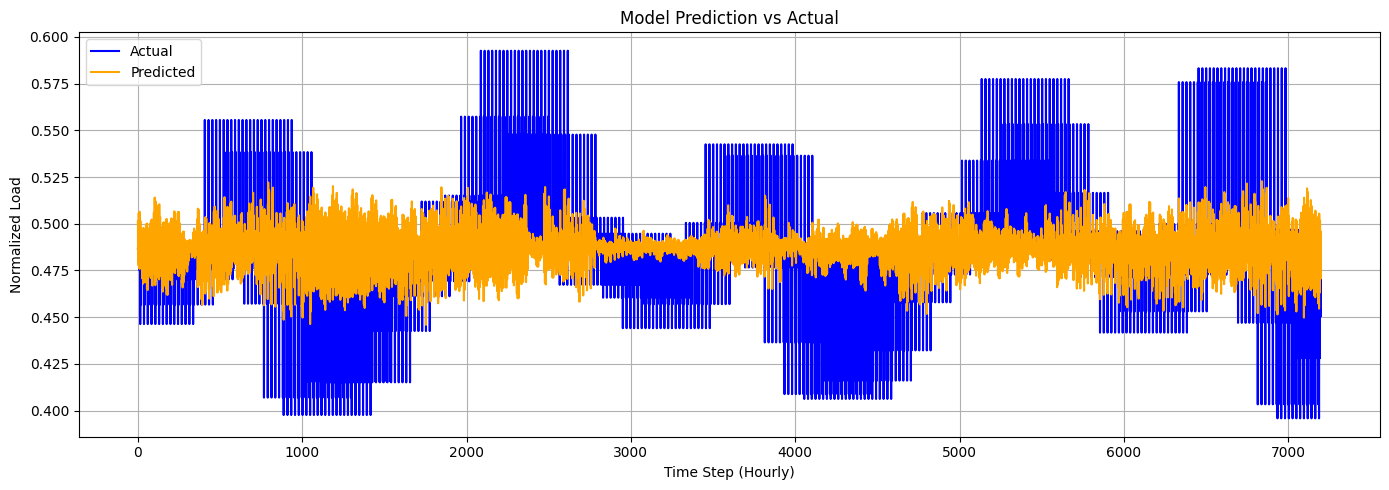

In [ ]:
# Overlay Line Plot (Predicted vs Actual)
# See how well the model follows the actual signal
y_pred_reg, y_pred_cls = model.predict(X_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test[:300].flatten(), label='Actual', color='blue')
plt.plot(y_pred_reg[:300].flatten(), label='Predicted', color='orange')
plt.title("Model Prediction vs Actual")
plt.xlabel("Time Step (Hourly)")
plt.ylabel("Normalized Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


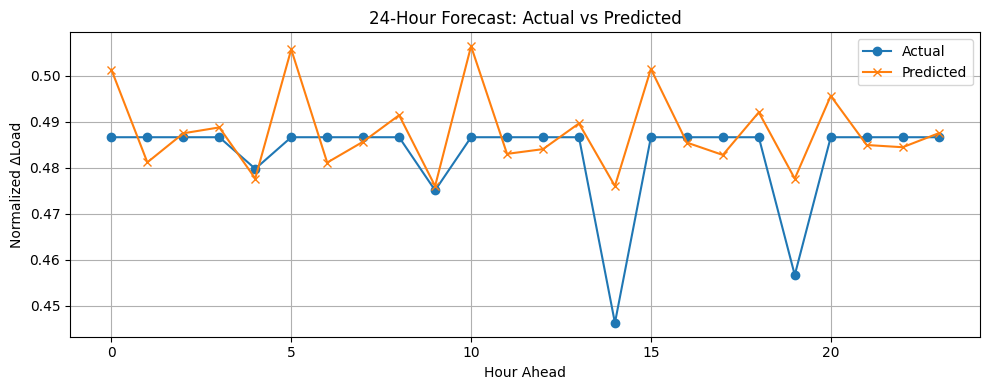

In [ ]:
# Predict and unpack outputs
y_pred_reg, y_pred_cls = model.predict(X_test)

# Plot for the first test sample (regression output)
plt.figure(figsize=(10, 4))
plt.plot(range(24), y_test[0], label='Actual', marker='o')
plt.plot(range(24), y_pred_reg[0], label='Predicted', marker='x')
plt.title("24-Hour Forecast: Actual vs Predicted")
plt.xlabel("Hour Ahead")
plt.ylabel("Normalized ΔLoad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

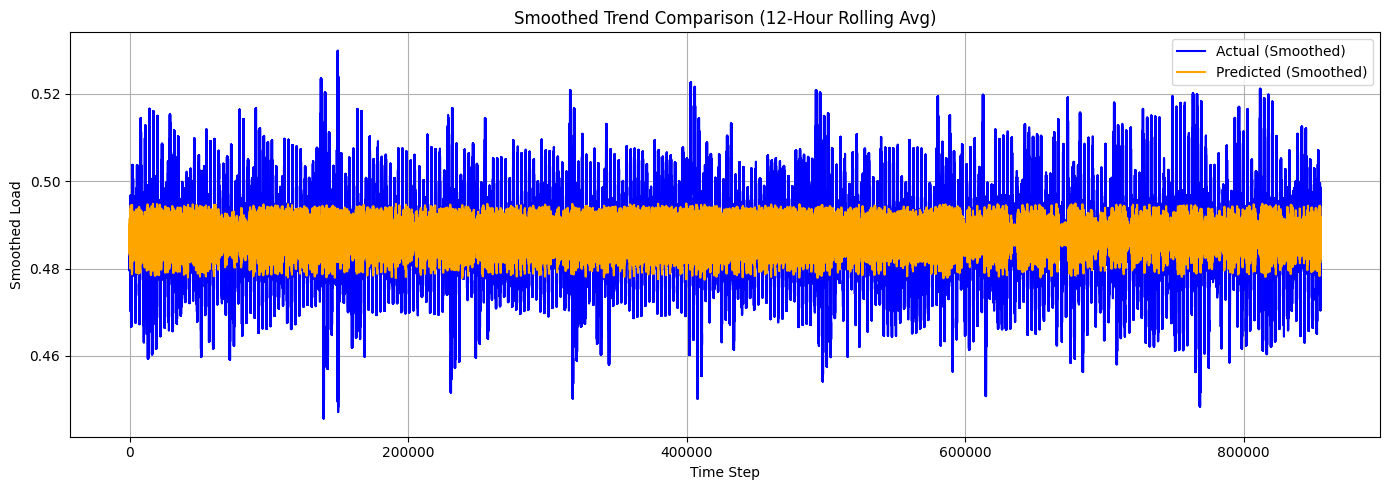

In [ ]:
# Smoothed Trends
# Visualize broader patterns, ignore noise
import pandas as pd

actual_smooth = pd.Series(y_test.flatten()).rolling(12).mean()
pred_smooth = pd.Series(y_pred_reg.flatten()).rolling(12).mean()

plt.figure(figsize=(14, 5))
plt.plot(actual_smooth, label='Actual (Smoothed)', color='blue')
plt.plot(pred_smooth, label='Predicted (Smoothed)', color='orange')
plt.title("Smoothed Trend Comparison (12-Hour Rolling Avg)")
plt.xlabel("Time Step")
plt.ylabel("Smoothed Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Predict both outputs
y_pred_reg, _ = model.predict(X_test)

# Compute actual and predicted 1-step differences
actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred_reg.flatten())

# Compare signs (direction)
trend_match = np.sign(actual_diff) == np.sign(pred_diff)

# Calculate accuracy
accuracy = np.mean(trend_match)
print(f"Trend Direction Accuracy: {accuracy:.2%}")

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Trend Direction Accuracy: 29.97%


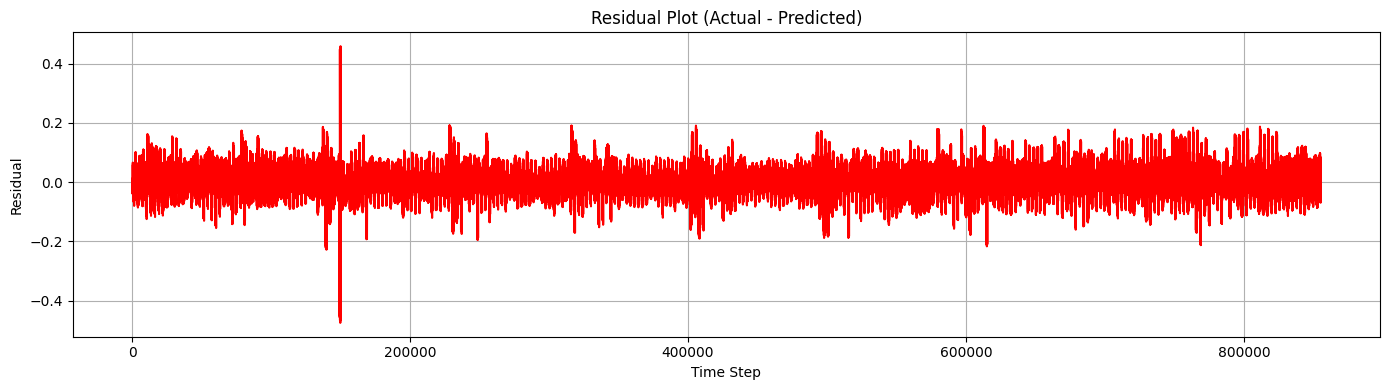

In [ ]:
# Residual Plot
# Check if the model error is biased (over/under-predict)
residuals = y_test.flatten() - y_pred_reg.flatten()

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Predict both outputs
y_pred_reg, y_pred_trend = model.predict(X_test)

# Round trend predictions to binary values (0 or 1)
y_pred_trend_binary = (y_pred_trend > 0.5).astype(int)

import numpy as np

# Flatten to compute overall accuracy
actual_trend_flat = y_trend_test.flatten()
predicted_trend_flat = y_pred_trend_binary.flatten()

direction_accuracy = np.mean(actual_trend_flat == predicted_trend_flat)
print(f"Overall Trend Direction Accuracy: {direction_accuracy * 100:.2f}%")

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Overall Trend Direction Accuracy: 89.87%


1114/1114 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


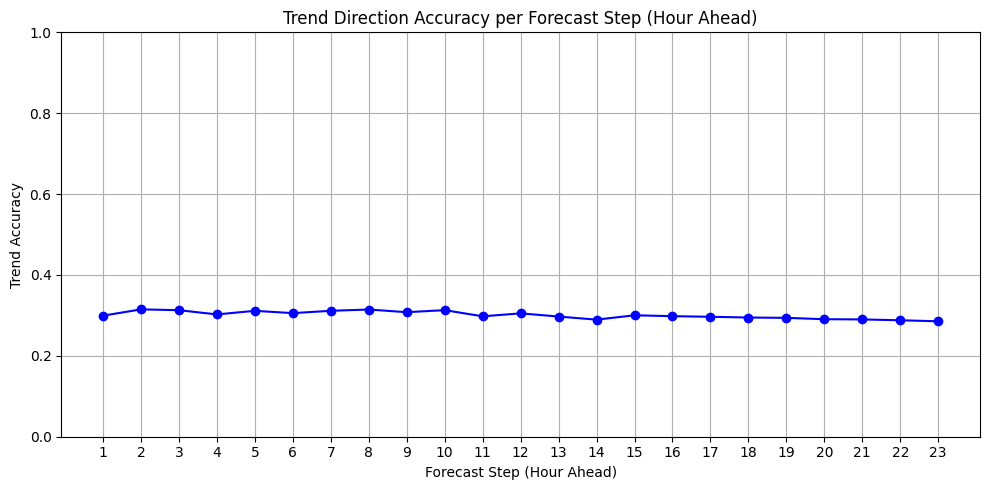

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict outputs
y_pred_reg, _ = model.predict(X_test)

# Initialize lists to store results
trend_accuracies = []
steps = range(1, y_test.shape[1])  # Start from step 1

for step in steps:
    actual_diff = y_test[:, step] - y_test[:, step - 1]
    pred_diff = y_pred_reg[:, step] - y_pred_reg[:, step - 1]

    match = np.sign(actual_diff) == np.sign(pred_diff)
    acc = np.mean(match)
    trend_accuracies.append(acc)

# Plot updated trend accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, 24), trend_accuracies, marker='o', color='blue')
plt.title("Trend Direction Accuracy per Forecast Step (Hour Ahead)")
plt.xlabel("Forecast Step (Hour Ahead)")
plt.ylabel("Trend Accuracy")
plt.xticks(range(1, 24))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

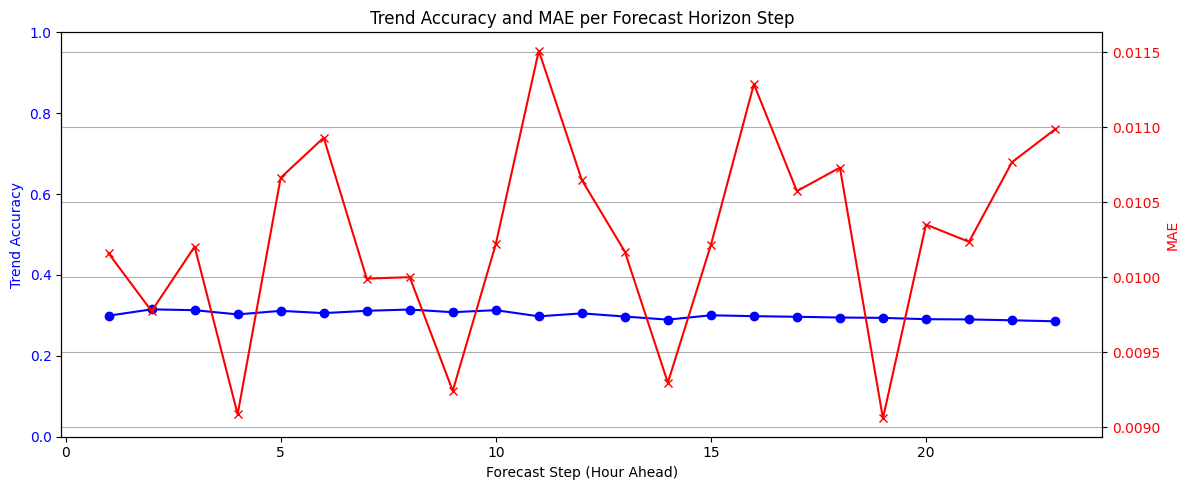

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#y_pred_reg, _ = model.predict(X_test)

trend_accuracies = []
step_maes = []
steps = range(1, y_test.shape[1])  # 1 to 23

for step in steps:
    actual_step = y_test[:, step]
    pred_step = y_pred_reg[:, step]

    # Trend accuracy
    actual_diff = actual_step - y_test[:, step - 1]
    pred_diff = pred_step - y_pred_reg[:, step - 1]
    match = np.sign(actual_diff) == np.sign(pred_diff)
    acc = np.mean(match)
    trend_accuracies.append(acc)

    # MAE for that step
    step_mae = np.mean(np.abs(actual_step - pred_step))
    step_maes.append(step_mae)

# Plot both on twin axes
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(steps, trend_accuracies, 'b-o', label='Trend Accuracy')
ax1.set_ylabel('Trend Accuracy', color='blue')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(steps, step_maes, 'r-x', label='MAE')
ax2.set_ylabel('MAE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Trend Accuracy and MAE per Forecast Horizon Step")
ax1.set_xlabel("Forecast Step (Hour Ahead)")
plt.grid(True)
plt.tight_layout()
plt.show()

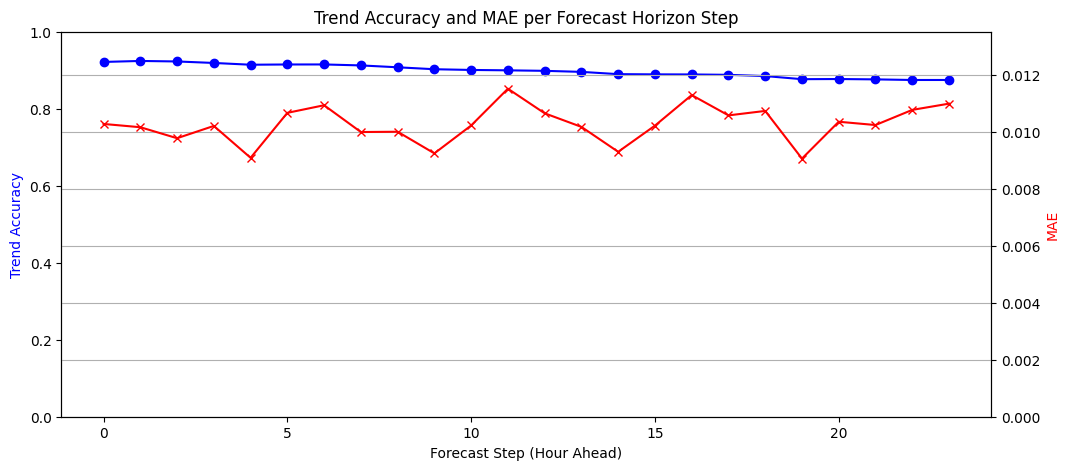

In [ ]:
import matplotlib.pyplot as plt

# Step-wise trend direction accuracy
step_acc = np.mean(y_pred_trend_binary == y_trend_test, axis=0)

# Step-wise MAE for regression output
step_mae = np.mean(np.abs(y_pred_reg - y_test), axis=0)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(step_acc, color='blue', marker='o')
ax1.set_ylabel("Trend Accuracy", color='blue')
ax1.set_ylim(0, 1)
ax1.set_xlabel("Forecast Step (Hour Ahead)")

ax2 = ax1.twinx()
ax2.plot(step_mae, color='red', marker='x')
ax2.set_ylabel("MAE", color='red')
ax2.set_ylim(0, max(step_mae) + 0.002)

plt.title("Trend Accuracy and MAE per Forecast Horizon Step")
plt.grid(True)
plt.show()

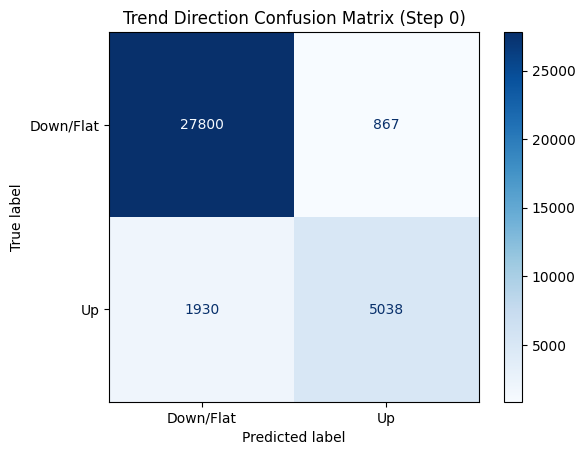

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_trend_test[:, 0], y_pred_trend_binary[:, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down/Flat", "Up"])
disp.plot(cmap="Blues")
plt.title("Trend Direction Confusion Matrix (Step 0)")
plt.show()

# LSTM Model Tunning


---



In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def build_lstm_model(hp):
    model = Sequential()

    # Tune number of units in first LSTM layer
    model.add(LSTM(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))

    # Second LSTM layer
    model.add(LSTM(
        units=hp.Int('units_2', 16, 64, step=16),
        return_sequences=True
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))

    # Third LSTM layer
    model.add(LSTM(
        units=hp.Int('units_3', 8, 32, step=8)
    ))
    model.add(Dropout(hp.Float('dropout_3', 0.1, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(forecast_horizon))  # 24-step output

    # Compile
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )

    return model

In [ ]:
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='lstm_tuning'
)

# Search for best hyperparameters
tuner.search(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=10,
             batch_size=64,
             verbose=1)

Trial 10 Complete [00h 04m 09s]
val_loss: 0.00045457767555490136

Best val_loss So Far: 0.0004522267263382673
Total elapsed time: 00h 38m 23s


In [ ]:
# Retrieve the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Best Test MAE: {test_mae:.4f}")
print(f"Best Hyperparameters: {best_hps.values}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Test MAE: 0.0115
Best Hyperparameters: {'units_1': 128, 'dropout_1': 0.2, 'units_2': 32, 'dropout_2': 0.30000000000000004, 'units_3': 8, 'dropout_3': 0.2}


In [ ]:
# Get all trials
tuner.results_summary(num_trials=10)

Results summary
Results in tuner_dir/lstm_tuning
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 03 summary
Hyperparameters:
units_1: 128
dropout_1: 0.2
units_2: 32
dropout_2: 0.30000000000000004
units_3: 8
dropout_3: 0.2
Score: 0.0004522267263382673

Trial 07 summary
Hyperparameters:
units_1: 96
dropout_1: 0.5
units_2: 32
dropout_2: 0.2
units_3: 24
dropout_3: 0.1
Score: 0.00045224459609016776

Trial 08 summary
Hyperparameters:
units_1: 64
dropout_1: 0.2
units_2: 32
dropout_2: 0.5
units_3: 24
dropout_3: 0.2
Score: 0.0004522669187281281

Trial 04 summary
Hyperparameters:
units_1: 64
dropout_1: 0.5
units_2: 16
dropout_2: 0.1
units_3: 24
dropout_3: 0.30000000000000004
Score: 0.0004523869720287621

Trial 00 summary
Hyperparameters:
units_1: 128
dropout_1: 0.30000000000000004
units_2: 16
dropout_2: 0.1
units_3: 24
dropout_3: 0.4
Score: 0.0004525310650933534

Trial 02 summary
Hyperparameters:
units_1: 32
dropout_1: 0.2
units_2: 16
dropout_2: 0.2
units_3: 32
dropout_

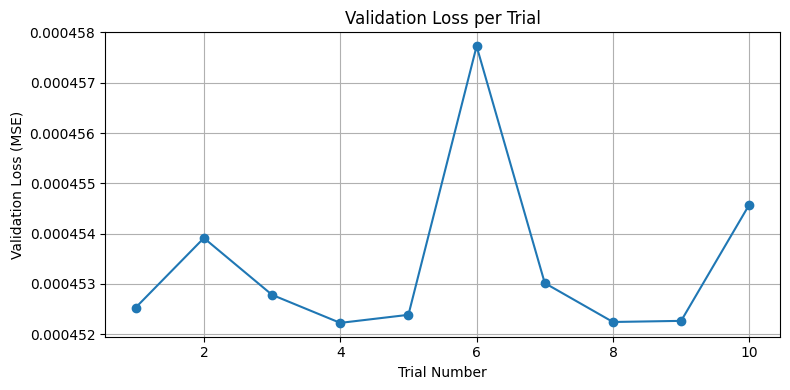

In [ ]:
import matplotlib.pyplot as plt

trial_val_losses = [trial.metrics.get_best_value('val_loss') for trial in tuner.oracle.trials.values()]

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(trial_val_losses) + 1), trial_val_losses, marker='o')
plt.title("Validation Loss per Trial")
plt.xlabel("Trial Number")
plt.ylabel("Validation Loss (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Build the best model using tuned hyperparameters
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(8))
model.add(Dropout(0.2))

model.add(Dense(forecast_horizon))  # Output layer for 24-hour forecast

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 128)        │        78,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 32)         │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 8)              │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,472 (392.47 KB)

 Trainable params: 100,472 (392.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=1
)

Epoch 1/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - loss: 0.0361 - mae: 0.1249 - val_loss: 5.2117e-04 - val_mae: 0.0124
Epoch 2/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - loss: 9.1120e-04 - mae: 0.0205 - val_loss: 4.8108e-04 - val_mae: 0.0111
Epoch 3/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 5.1213e-04 - mae: 0.0116 - val_loss: 4.7299e-04 - val_mae: 0.0115
Epoch 4/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 4.9880e-04 - mae: 0.0117 - val_loss: 4.6715e-04 - val_mae: 0.0112
Epoch 5/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 4.9260e-04 - mae: 0.0119 - val_loss: 4.6063e-04 - val_mae: 0.0116
Epoch 6/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 4.9138e-04 - mae: 0.0121 - val_loss: 4.6253e-04 - val_mae: 0.0113
Epoch 7/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 4.8686e-04 - mae: 0.0121 - val_loss: 4.5500e-04 - val_mae: 0.0116
Epoch 8/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 4.8462e-04 - mae: 0.0121 - val

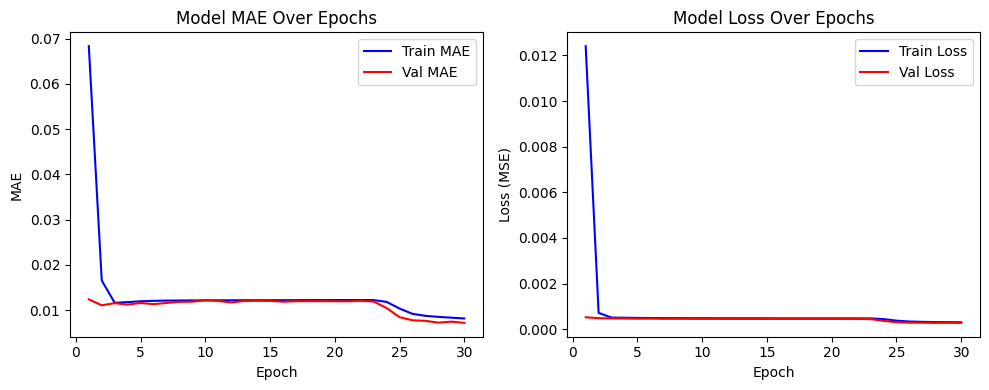

Test Loss (MSE): 0.0003
Test MAE: 0.0072


In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# Plot MAE and Loss
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Model MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Model Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


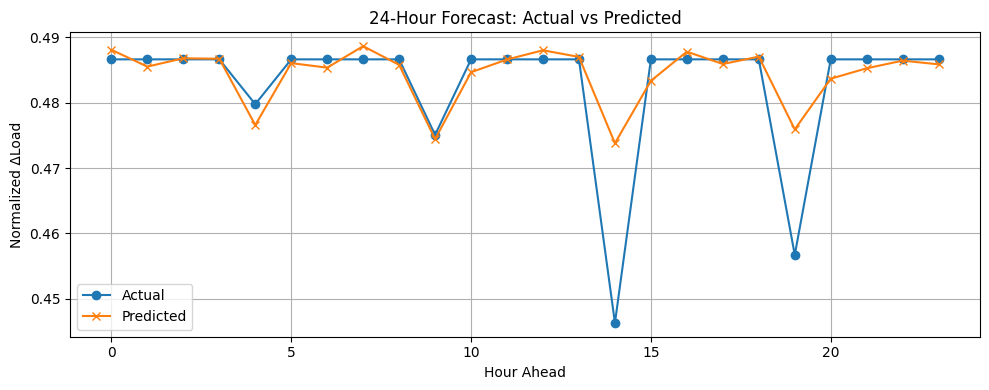

In [ ]:
# Overlay Line Plot (Predicted vs Actual)
# See how well the model follows the actual signal
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 4))
plt.plot(range(24), y_test[0], label='Actual', marker='o')
plt.plot(range(24), y_pred[0], label='Predicted', marker='x')
plt.title("24-Hour Forecast: Actual vs Predicted")
plt.xlabel("Hour Ahead")
plt.ylabel("Normalized ΔLoad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

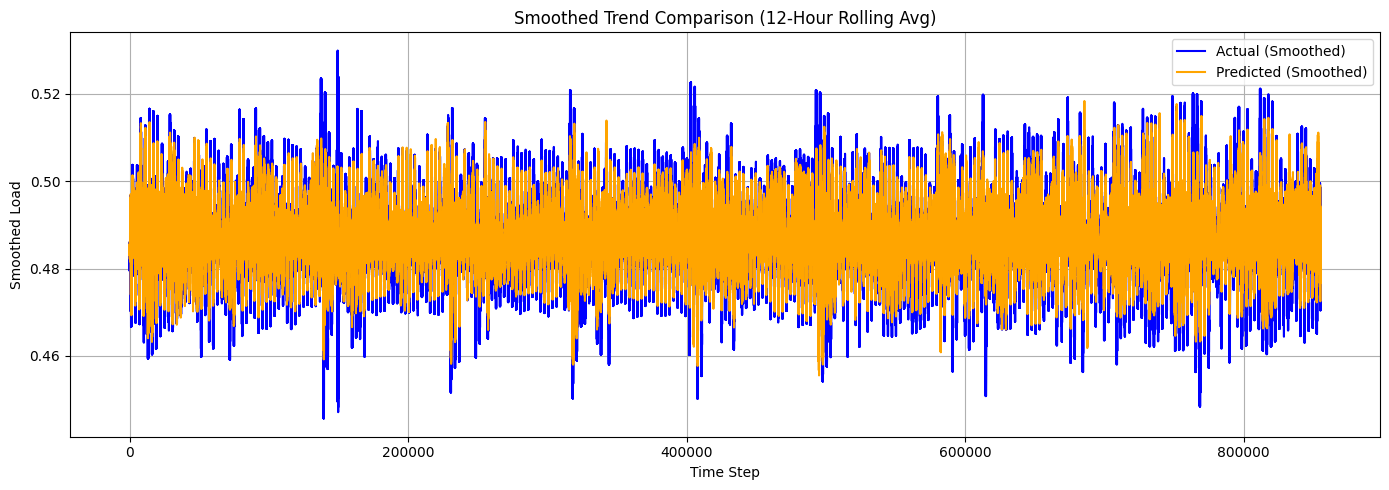

In [ ]:
# Smoothed Trends
# Visualize broader patterns, ignore noise
import pandas as pd

actual_smooth = pd.Series(y_test.flatten()).rolling(12).mean()
pred_smooth = pd.Series(y_pred.flatten()).rolling(12).mean()

plt.figure(figsize=(14, 5))
plt.plot(actual_smooth, label='Actual (Smoothed)', color='blue')
plt.plot(pred_smooth, label='Predicted (Smoothed)', color='orange')
plt.title("Smoothed Trend Comparison (12-Hour Rolling Avg)")
plt.xlabel("Time Step")
plt.ylabel("Smoothed Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Trend Direction Accuracy
# See if the model gets the up/down direction right
import numpy as np

actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred.flatten())

trend_match = np.sign(actual_diff) == np.sign(pred_diff)
accuracy = np.mean(trend_match)

print(f"Trend Direction Accuracy: {accuracy:.2%}")

Trend Direction Accuracy: 29.70%


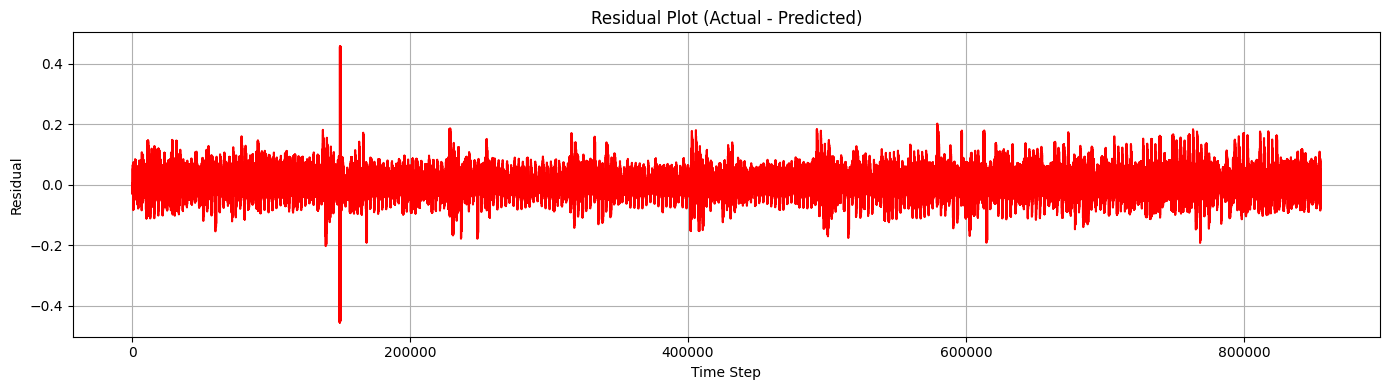

In [ ]:
# Residual Plot
# Check if the model error is biased (over/under-predict)
residuals = y_test.flatten() - y_pred.flatten()

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

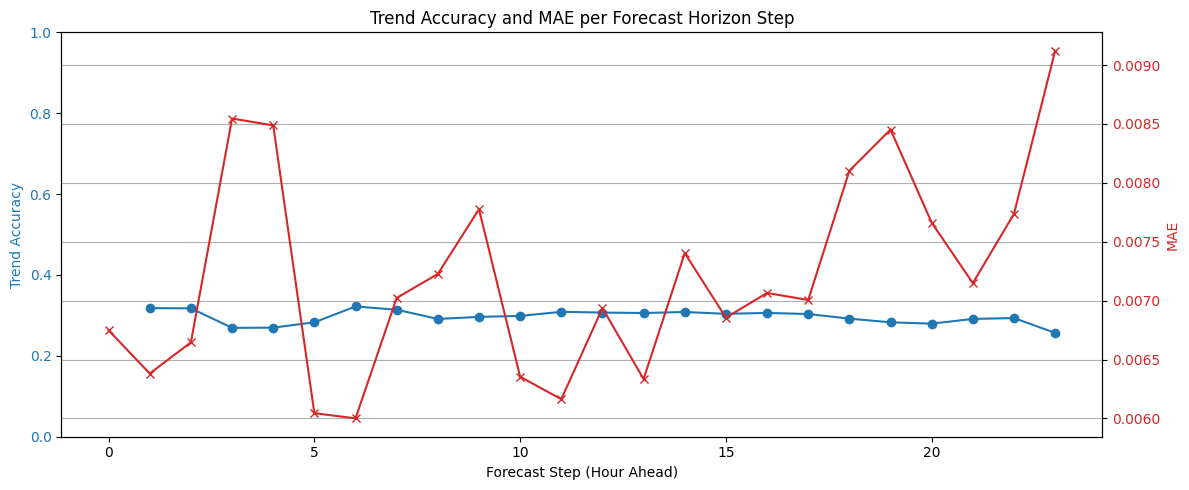

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Calculate Trend Accuracy per Forecast Step ---
trend_accuracies = []

for i in range(1, 24):  # From step 1 to 23 (we skip step 0 due to no previous value)
    actual_trend = np.sign(y_test[:, i] - y_test[:, i - 1])
    pred_trend = np.sign(y_pred[:, i] - y_pred[:, i - 1])
    accuracy = np.mean(actual_trend == pred_trend)
    trend_accuracies.append(accuracy)

# --- Calculate MAE per Forecast Step ---
mae_per_step = np.mean(np.abs(y_test - y_pred), axis=0)

# --- Plot Trend Accuracy and MAE ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Trend Accuracy
color = 'tab:blue'
ax1.set_xlabel('Forecast Step (Hour Ahead)')
ax1.set_ylabel('Trend Accuracy', color=color)
ax1.plot(range(1, 24), trend_accuracies, color=color, marker='o', label='Trend Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)

# Plot MAE (Right Y-axis)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MAE', color=color)
ax2.plot(range(24), mae_per_step, color=color, marker='x', label='MAE')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Trend Accuracy and MAE per Forecast Horizon Step")
plt.grid(True)
plt.tight_layout()
plt.show()

#**Model Building - CNN**

# 4.1.2.1 Basic CNN Model Architecture (delta_load - 24 Hours)


---





In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(forecast_horizon))  # Output layer

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 64)         │         4,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 12, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,760 (96.72 KB)

 Trainable params: 24,760 (96.72 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=1
)

Epoch 1/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.0127 - mae: 0.0577 - val_loss: 5.1941e-04 - val_mae: 0.0117
Epoch 2/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 5.2577e-04 - mae: 0.0120 - val_loss: 4.7740e-04 - val_mae: 0.0108
Epoch 3/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 4.9654e-04 - mae: 0.0120 - val_loss: 4.7047e-04 - val_mae: 0.0110
Epoch 4/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 4.9110e-04 - mae: 0.0123 - val_loss: 4.7060e-04 - val_mae: 0.0111
Epoch 5/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 4.8674e-04 - mae: 0.0123 - val_loss: 4.4460e-04 - val_mae: 0.0111
Epoch 6/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 4.5671e-04 - mae: 0.0119 - val_loss: 3.6877e-04 - val_mae: 0.0099
Epoch 7/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 3.8089e-04 - mae: 0.0108 - val_loss: 3.3122e-04 - val_mae: 0.0096
Epoch 8/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.5730e-04 - mae: 0.0103 - val_loss: 3.

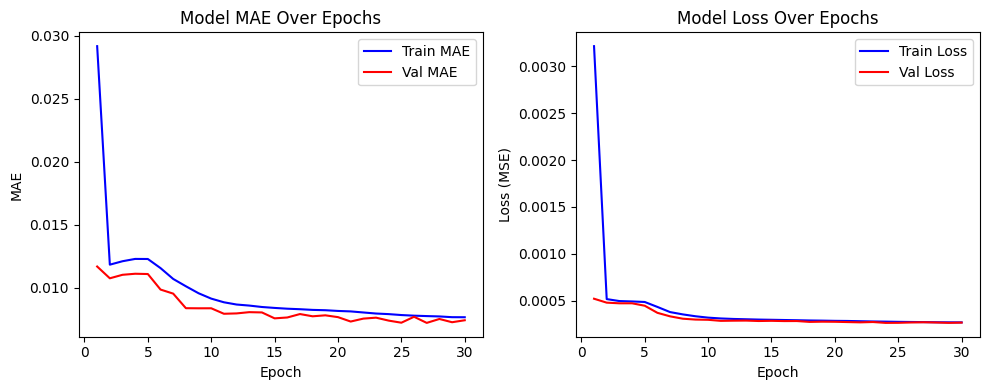

Test Loss (MSE): 0.0003
Test MAE: 0.0075


In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# Plot MAE and Loss
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Model MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Model Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


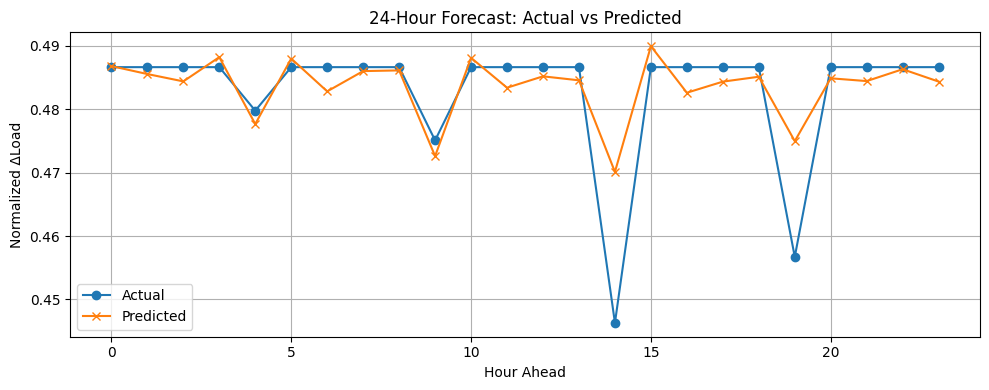

In [ ]:
# Overlay Line Plot (Predicted vs Actual)
# See how well the model follows the actual signal
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 4))
plt.plot(range(24), y_test[0], label='Actual', marker='o')
plt.plot(range(24), y_pred[0], label='Predicted', marker='x')
plt.title("24-Hour Forecast: Actual vs Predicted")
plt.xlabel("Hour Ahead")
plt.ylabel("Normalized ΔLoad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

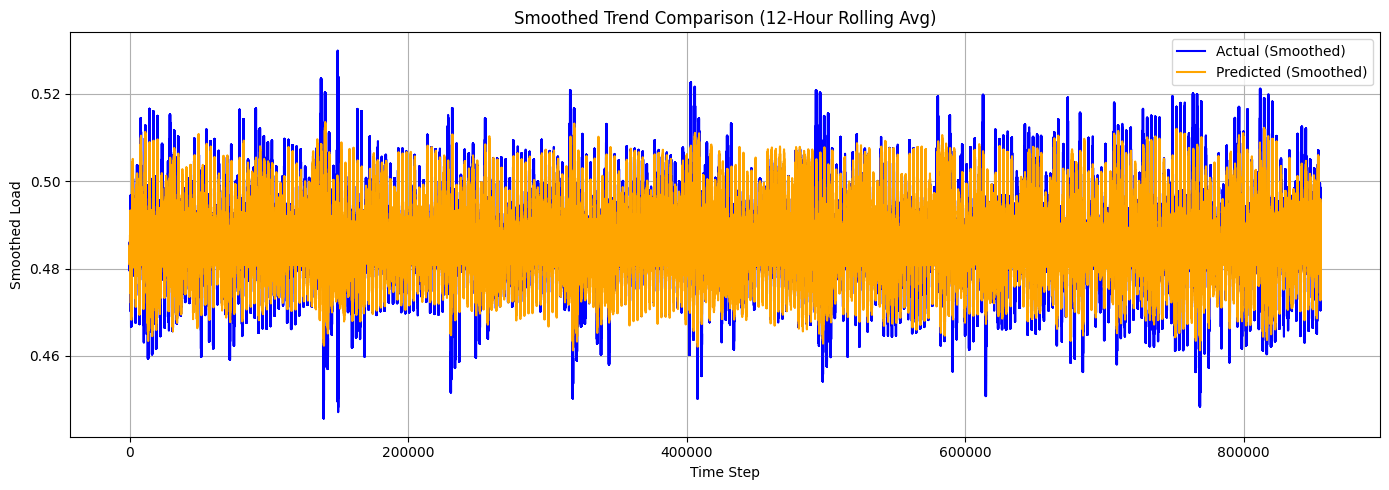

In [ ]:
# Smoothed Trends
# Visualize broader patterns, ignore noise
import pandas as pd

actual_smooth = pd.Series(y_test.flatten()).rolling(12).mean()
pred_smooth = pd.Series(y_pred.flatten()).rolling(12).mean()

plt.figure(figsize=(14, 5))
plt.plot(actual_smooth, label='Actual (Smoothed)', color='blue')
plt.plot(pred_smooth, label='Predicted (Smoothed)', color='orange')
plt.title("Smoothed Trend Comparison (12-Hour Rolling Avg)")
plt.xlabel("Time Step")
plt.ylabel("Smoothed Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Trend Direction Accuracy
# See if the model gets the up/down direction right
import numpy as np

actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred.flatten())

trend_match = np.sign(actual_diff) == np.sign(pred_diff)
accuracy = np.mean(trend_match)

print(f"Trend Direction Accuracy: {accuracy:.2%}")

Trend Direction Accuracy: 29.44%


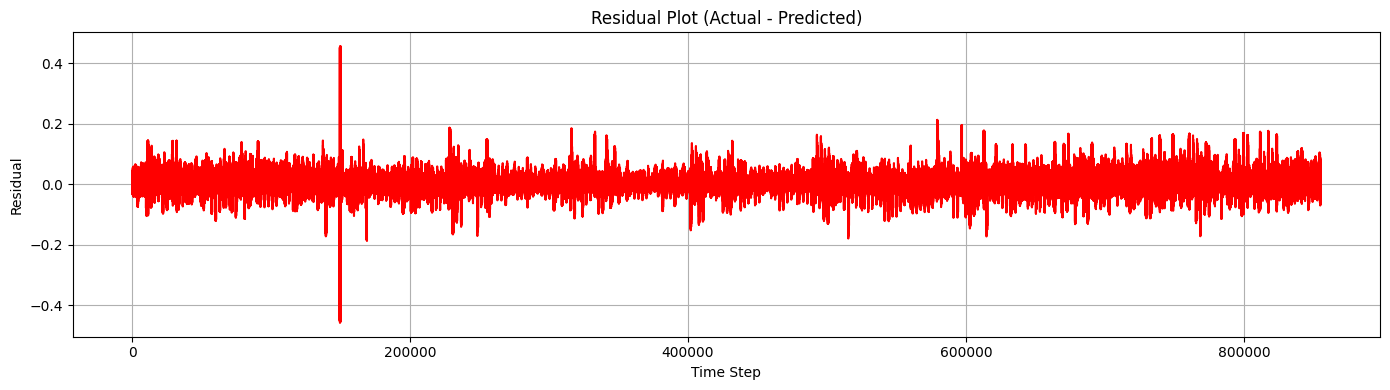

In [ ]:
# Residual Plot
# Check if the model error is biased (over/under-predict)
residuals = y_test.flatten() - y_pred.flatten()

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

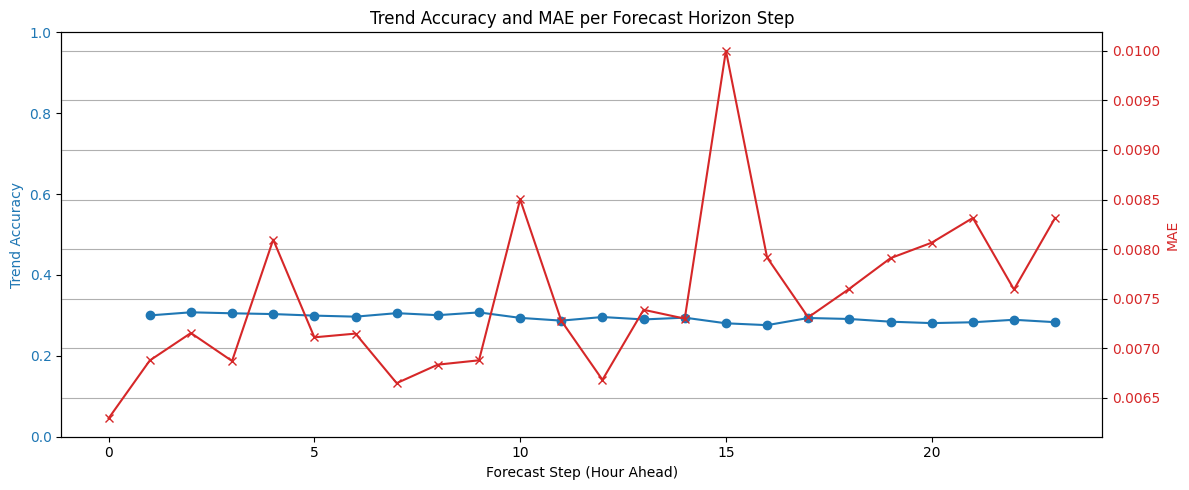

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Calculate Trend Accuracy per Forecast Step ---
trend_accuracies = []

for i in range(1, 24):  # From step 1 to 23 (we skip step 0 due to no previous value)
    actual_trend = np.sign(y_test[:, i] - y_test[:, i - 1])
    pred_trend = np.sign(y_pred[:, i] - y_pred[:, i - 1])
    accuracy = np.mean(actual_trend == pred_trend)
    trend_accuracies.append(accuracy)

# --- Calculate MAE per Forecast Step ---
mae_per_step = np.mean(np.abs(y_test - y_pred), axis=0)

# --- Plot Trend Accuracy and MAE ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Trend Accuracy
color = 'tab:blue'
ax1.set_xlabel('Forecast Step (Hour Ahead)')
ax1.set_ylabel('Trend Accuracy', color=color)
ax1.plot(range(1, 24), trend_accuracies, color=color, marker='o', label='Trend Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)

# Plot MAE (Right Y-axis)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MAE', color=color)
ax2.plot(range(24), mae_per_step, color=color, marker='x', label='MAE')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Trend Accuracy and MAE per Forecast Horizon Step")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.1.2.2 Conv1D + Bidirectional + Attention Model Architecture (delta_load - 24 hours)


---



In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Bidirectional, LSTM, Attention, Concatenate, Dense

input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Dropout(0.3)(x)

attn = Attention()([x, x])
x = Concatenate()([x, attn])

x = LSTM(32)(x)
x = Dropout(0.2)(x)

output = Dense(forecast_horizon)(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 30, 27)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 30, 64)    │      5,248 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 15, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 15, 64)    │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 15, 128)   │     66,048 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 15, 128)   │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 15, 128)   │          0 │ dropout_1[0][0],  │
│ (Attention)         │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 15, 256)   │          0 │ dropout_1[0][0],  │
│ (Concatenate)       │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │     36,992 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 24)        │        792 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 109,080 (426.09 KB)

 Trainable params: 109,080 (426.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - loss: 0.0135 - mae: 0.0750 - val_loss: 5.0381e-04 - val_mae: 0.0117
Epoch 2/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - loss: 7.6529e-04 - mae: 0.0186 - val_loss: 5.0105e-04 - val_mae: 0.0115
Epoch 3/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 4.9520e-04 - mae: 0.0120 - val_loss: 4.8874e-04 - val_mae: 0.0118
Epoch 4/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 4.8729e-04 - mae: 0.0120 - val_loss: 4.8327e-04 - val_mae: 0.0121
Epoch 5/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 4.7647e-04 - mae: 0.0121 - val_loss: 4.7991e-04 - val_mae: 0.0123
Epoch 6/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 4.7716e-04 - mae: 0.0122 - val_loss: 4.7847e-04 - val_mae: 0.0119
Epoch 7/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 4.7179e-04 - mae: 0.0122 - val_loss: 4.7450e-04 - val_mae: 0.0124
Epoch 8/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 4.6827e-04 - mae: 0.0121 - val

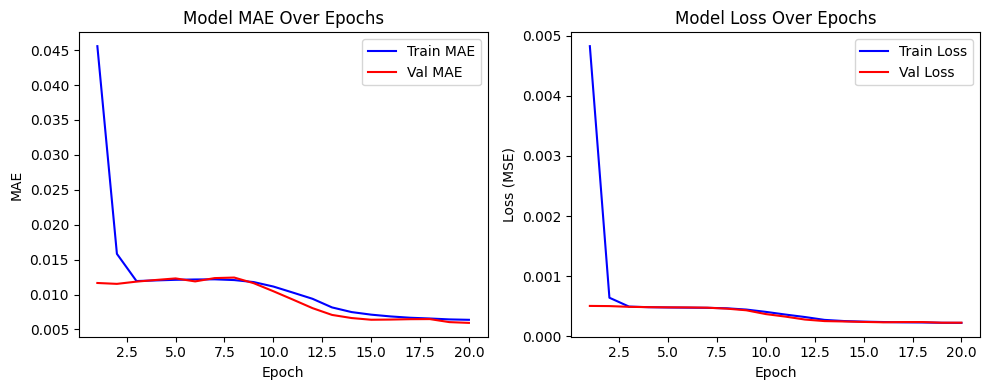

Test Loss (MSE): 0.0002
Test MAE: 0.0060


In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# Plot MAE and Loss
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Model MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Model Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


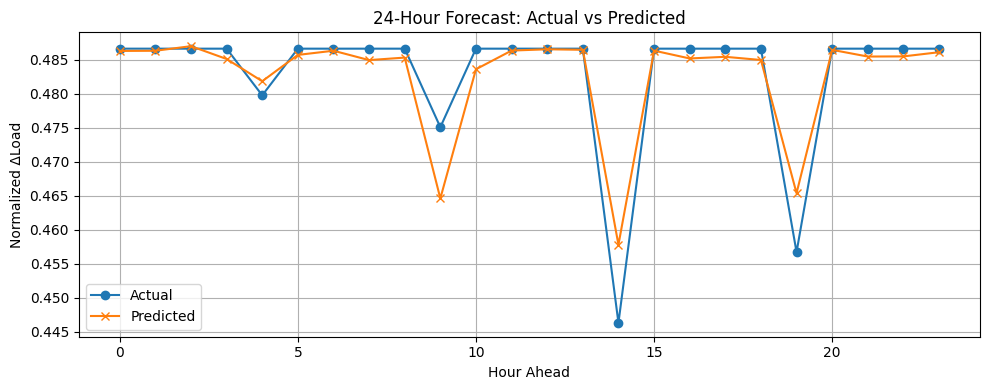

In [ ]:
# Overlay Line Plot (Predicted vs Actual)
# See how well the model follows the actual signal
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 4))
plt.plot(range(24), y_test[0], label='Actual', marker='o')
plt.plot(range(24), y_pred[0], label='Predicted', marker='x')
plt.title("24-Hour Forecast: Actual vs Predicted")
plt.xlabel("Hour Ahead")
plt.ylabel("Normalized ΔLoad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

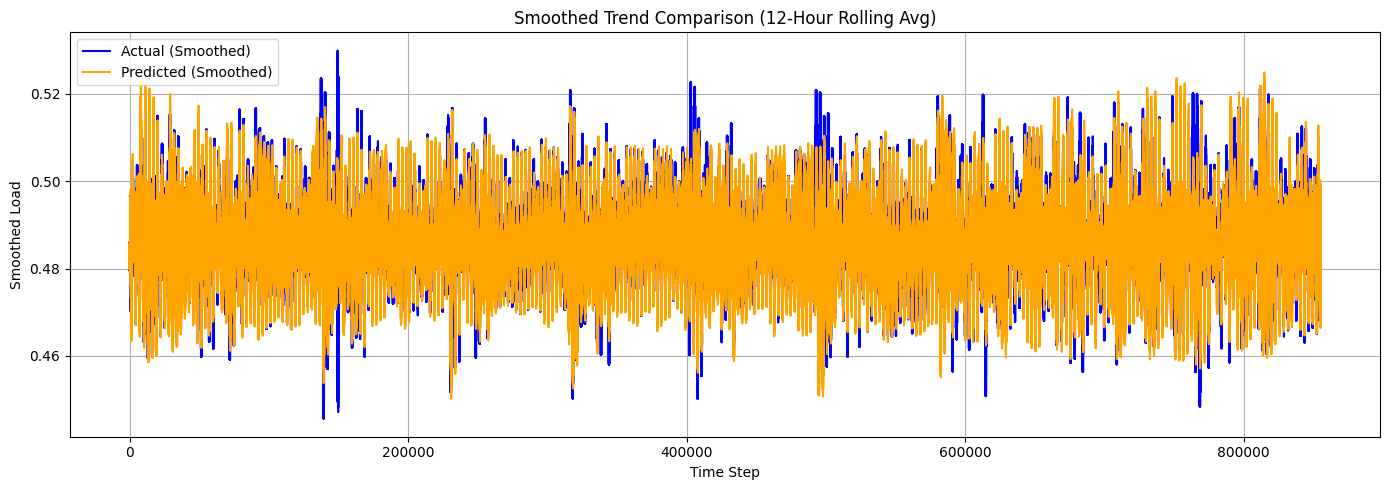

In [ ]:
# Smoothed Trends
# Visualize broader patterns, ignore noise
import pandas as pd

actual_smooth = pd.Series(y_test.flatten()).rolling(12).mean()
pred_smooth = pd.Series(y_pred.flatten()).rolling(12).mean()

plt.figure(figsize=(14, 5))
plt.plot(actual_smooth, label='Actual (Smoothed)', color='blue')
plt.plot(pred_smooth, label='Predicted (Smoothed)', color='orange')
plt.title("Smoothed Trend Comparison (12-Hour Rolling Avg)")
plt.xlabel("Time Step")
plt.ylabel("Smoothed Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Trend Direction Accuracy
# See if the model gets the up/down direction right
import numpy as np

actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred.flatten())

trend_match = np.sign(actual_diff) == np.sign(pred_diff)
accuracy = np.mean(trend_match)

print(f"Trend Direction Accuracy: {accuracy:.2%}")

Trend Direction Accuracy: 31.67%


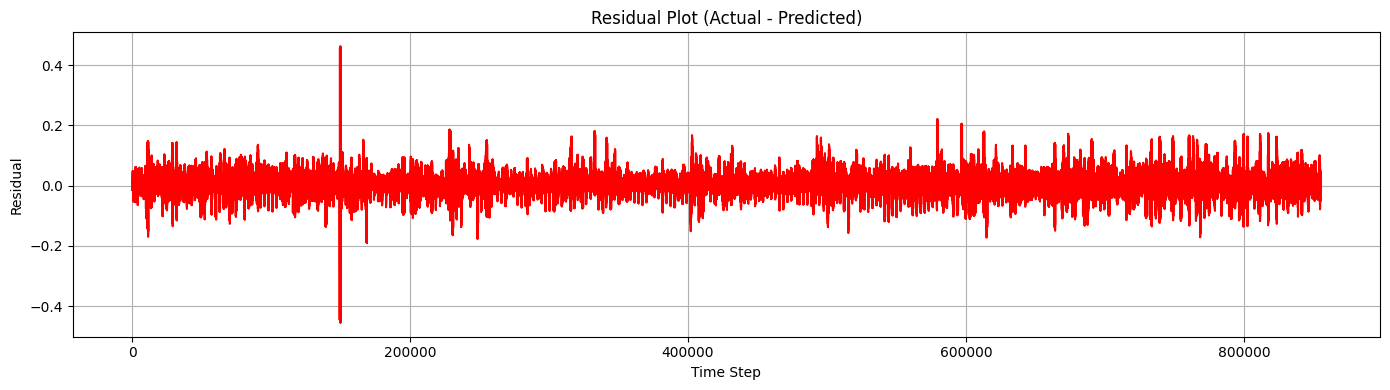

In [ ]:
# Residual Plot
# Check if the model error is biased (over/under-predict)
residuals = y_test.flatten() - y_pred.flatten()

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

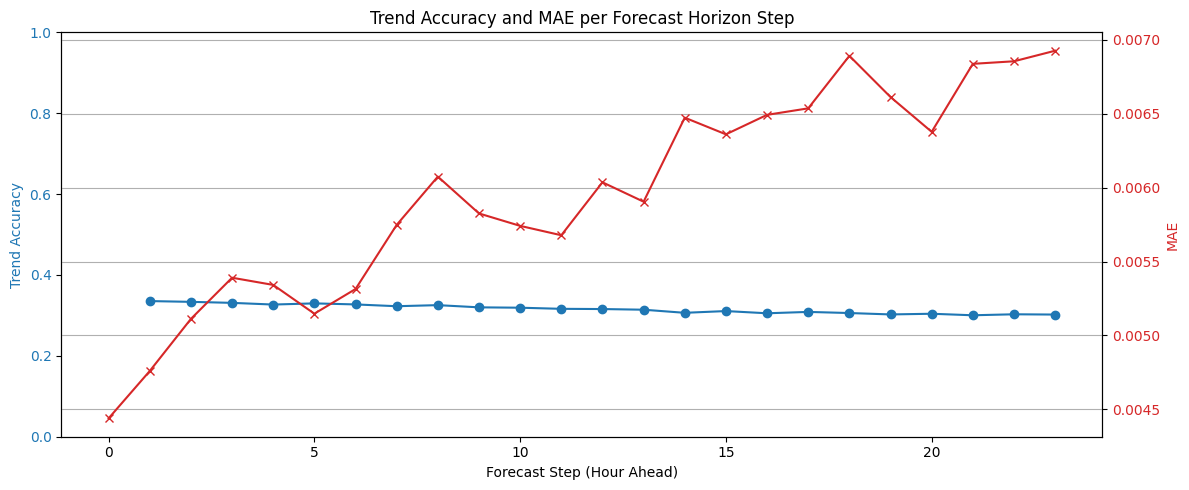

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Calculate Trend Accuracy per Forecast Step ---
trend_accuracies = []

for i in range(1, 24):  # From step 1 to 23 (we skip step 0 due to no previous value)
    actual_trend = np.sign(y_test[:, i] - y_test[:, i - 1])
    pred_trend = np.sign(y_pred[:, i] - y_pred[:, i - 1])
    accuracy = np.mean(actual_trend == pred_trend)
    trend_accuracies.append(accuracy)

# --- Calculate MAE per Forecast Step ---
mae_per_step = np.mean(np.abs(y_test - y_pred), axis=0)

# --- Plot Trend Accuracy and MAE ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Trend Accuracy
color = 'tab:blue'
ax1.set_xlabel('Forecast Step (Hour Ahead)')
ax1.set_ylabel('Trend Accuracy', color=color)
ax1.plot(range(1, 24), trend_accuracies, color=color, marker='o', label='Trend Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)

# Plot MAE (Right Y-axis)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MAE', color=color)
ax2.plot(range(24), mae_per_step, color=color, marker='x', label='MAE')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Trend Accuracy and MAE per Forecast Horizon Step")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.3.2.3 Multi-Task CNN + BiLSTM + Attention Model Evaluation (delta_load - 24 hours)

In [ ]:
# y shape: (samples, 24)
y_trend = (np.diff(y, axis=1) > 0).astype(int)  # (samples, 23)

# Pad to match 24 steps
y_trend = np.concatenate([y_trend, y_trend[:, -1:]], axis=1)

In [ ]:
# split train+val vs test (80% / 20%)
y_trend_temp, y_trend_test = train_test_split(y_trend, test_size=0.2, shuffle=False)

# split train vs val (60% / 20%)
y_trend_train, y_trend_val = train_test_split(y_trend_temp, test_size=0.25, shuffle=False)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, Dropout,
                                     Bidirectional, LSTM, Attention, Concatenate, Dense)
from tensorflow.keras.optimizers import Adam

def create_multitask_model(lstm_units, dropout_rate, learning_rate):
    input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

    x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(dropout_rate)(x)

    x = Bidirectional(LSTM(lstm_units, return_sequences=True))(x)
    x = Dropout(dropout_rate)(x)

    attn = Attention()([x, x])
    x = Concatenate()([x, attn])

    x = LSTM(32)(x)
    x = Dropout(dropout_rate)(x)

    # Output 1: delta_load regression
    output_reg = Dense(24, name='load_output')(x)

    # Output 2: trend classification
    output_cls = Dense(24, activation='sigmoid', name='trend_output')(x)

    model = Model(inputs=input_layer, outputs=[output_reg, output_cls])
    model.compile(
        optimizer=Adam(learning_rate),
        loss={'load_output': 'mse', 'trend_output': 'binary_crossentropy'},
        loss_weights={'load_output': 0.8, 'trend_output': 0.2},
        metrics={'load_output': 'mae', 'trend_output': 'accuracy'}
    )
    return model

In [ ]:
model = create_multitask_model(
    lstm_units=34,
    dropout_rate=0.1045,
    learning_rate=0.00307
)

history = model.fit(
    X_train,
    {'load_output': y_train, 'trend_output': y_trend_train},
    validation_data=(X_val, {'load_output': y_val, 'trend_output': y_trend_val}),
    epochs=30,
    batch_size=64,
    verbose=1
)

Epoch 1/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - load_output_loss: 0.0070 - load_output_mae: 0.0508 - loss: 0.1070 - trend_output_accuracy: 0.0599 - trend_output_loss: 0.5067 - val_load_output_loss: 4.9684e-04 - val_load_output_mae: 0.0140 - val_loss: 0.0681 - val_trend_output_accuracy: 0.0701 - val_trend_output_loss: 0.3384
Epoch 2/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - load_output_loss: 5.8528e-04 - load_output_mae: 0.0159 - loss: 0.0573 - trend_output_accuracy: 0.1646 - trend_output_loss: 0.2844 - val_load_output_loss: 3.6746e-04 - val_load_output_mae: 0.0111 - val_loss: 0.0536 - val_trend_output_accuracy: 0.2879 - val_trend_output_loss: 0.2664
Epoch 3/30
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - load_output_loss: 4.0423e-04 - load_output_mae: 0.0121 - loss: 0.0461 - trend_output_accuracy: 0.3238 - trend_output_loss: 0.2287 - val_load_output_loss: 3.4581e-04 - val_load_output_mae: 0.0106 - val_loss: 0.0503 - val_trend_output_accuracy: 0.3461 - val_trend_outp

In [ ]:
results = model.evaluate(
    X_test,
    {'load_output': y_test, 'trend_output': y_trend_test},
    verbose=1
)

print("Test MSE (delta_load):", results[1])
print("Test MAE:", results[3])
print("Test Trend Accuracy:", results[4])

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - load_output_loss: 3.5806e-04 - load_output_mae: 0.0103 - loss: 0.0503 - trend_output_accuracy: 0.4125 - trend_output_loss: 0.2499
Test MSE (delta_load): 0.000356618023943156
Test MAE: 0.01021560002118349
Test Trend Accuracy: 0.41074785590171814


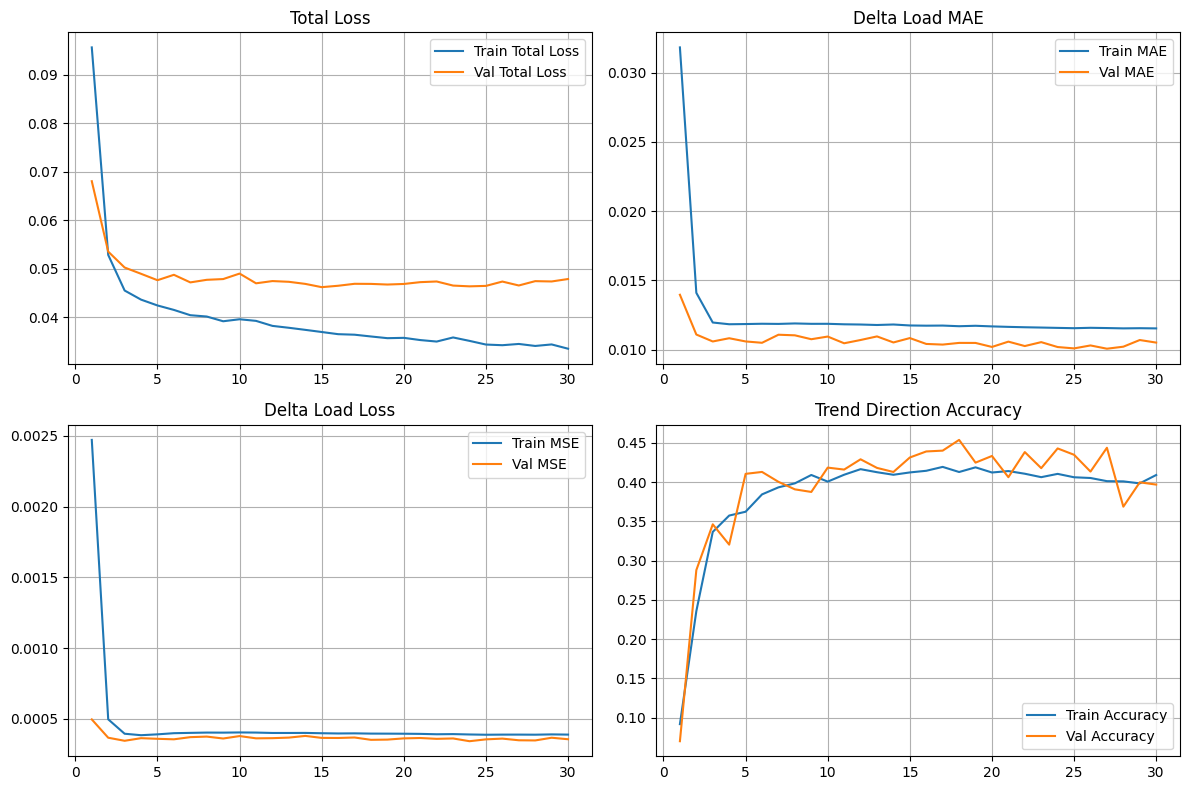

In [ ]:
# Extract losses and metrics from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

load_loss = history.history['load_output_loss']
val_load_loss = history.history['val_load_output_loss']

trend_loss = history.history['trend_output_loss']
val_trend_loss = history.history['val_trend_output_loss']

load_mae = history.history['load_output_mae']
val_load_mae = history.history['val_load_output_mae']

trend_acc = history.history['trend_output_accuracy']
val_trend_acc = history.history['val_trend_output_accuracy']

epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Total Loss
axs[0, 0].plot(epochs, loss, label='Train Total Loss')
axs[0, 0].plot(epochs, val_loss, label='Val Total Loss')
axs[0, 0].set_title('Total Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Regression MAE
axs[0, 1].plot(epochs, load_mae, label='Train MAE')
axs[0, 1].plot(epochs, val_load_mae, label='Val MAE')
axs[0, 1].set_title('Delta Load MAE')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Regression Loss (MSE)
axs[1, 0].plot(epochs, load_loss, label='Train MSE')
axs[1, 0].plot(epochs, val_load_loss, label='Val MSE')
axs[1, 0].set_title('Delta Load Loss')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Trend Classification Accuracy
axs[1, 1].plot(epochs, trend_acc, label='Train Accuracy')
axs[1, 1].plot(epochs, val_trend_acc, label='Val Accuracy')
axs[1, 1].set_title('Trend Direction Accuracy')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

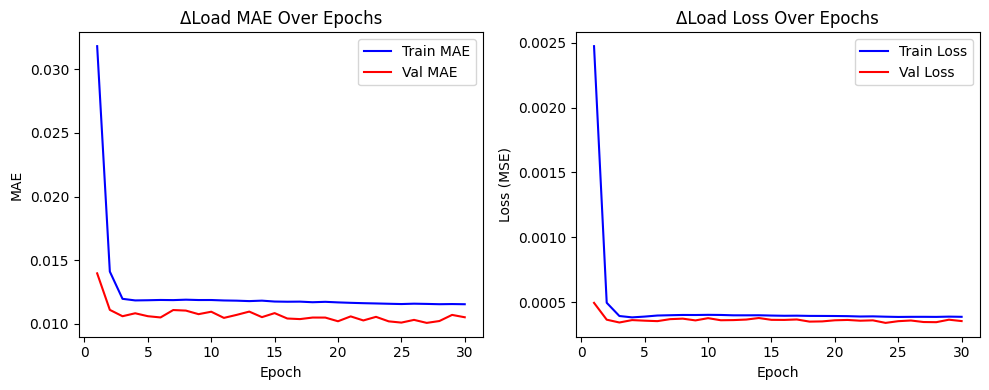

In [ ]:
# Extract correct history keys for ΔLoad prediction
mae = history.history['load_output_mae']
val_mae = history.history['val_load_output_mae']
loss = history.history['load_output_loss']
val_loss = history.history['val_load_output_loss']

epochs = range(1, len(mae) + 1)

# Plot MAE and Loss
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('ΔLoad MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('ΔLoad Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


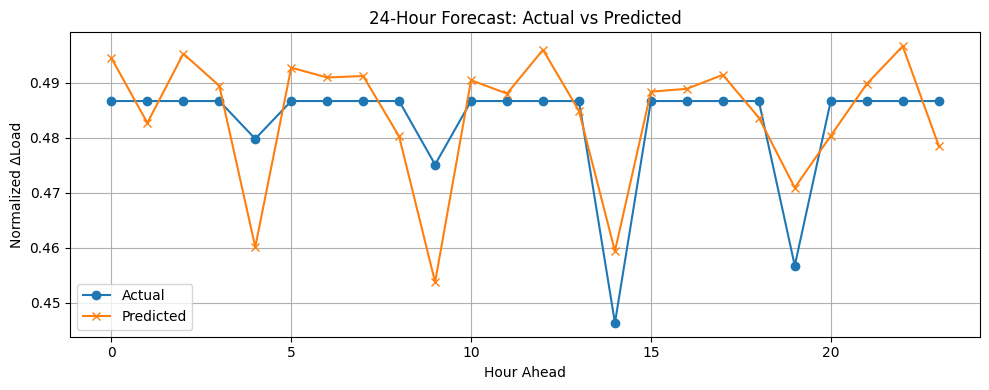

In [ ]:
# Predict and unpack outputs
y_pred_reg, y_pred_cls = model.predict(X_test)

# Plot for the first test sample (regression output)
plt.figure(figsize=(10, 4))
plt.plot(range(24), y_test[0], label='Actual', marker='o')
plt.plot(range(24), y_pred_reg[0], label='Predicted', marker='x')
plt.title("24-Hour Forecast: Actual vs Predicted")
plt.xlabel("Hour Ahead")
plt.ylabel("Normalized ΔLoad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

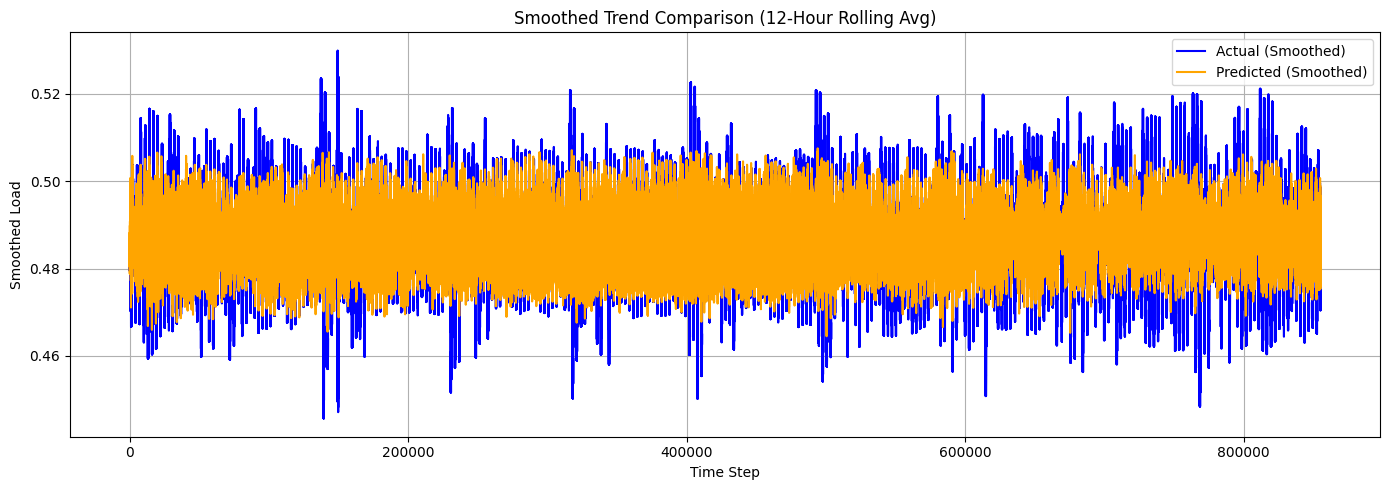

In [ ]:
# Smoothed Trends
# Visualize broader patterns, ignore noise
import pandas as pd

actual_smooth = pd.Series(y_test.flatten()).rolling(12).mean()
pred_smooth = pd.Series(y_pred_reg.flatten()).rolling(12).mean()

plt.figure(figsize=(14, 5))
plt.plot(actual_smooth, label='Actual (Smoothed)', color='blue')
plt.plot(pred_smooth, label='Predicted (Smoothed)', color='orange')
plt.title("Smoothed Trend Comparison (12-Hour Rolling Avg)")
plt.xlabel("Time Step")
plt.ylabel("Smoothed Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Predict both outputs
y_pred_reg, _ = model.predict(X_test)

# Compute actual and predicted 1-step differences
actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred_reg.flatten())

# Compare signs (direction)
trend_match = np.sign(actual_diff) == np.sign(pred_diff)

# Calculate accuracy
accuracy = np.mean(trend_match)
print(f"Trend Direction Accuracy: {accuracy:.2%}")

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Trend Direction Accuracy: 31.02%


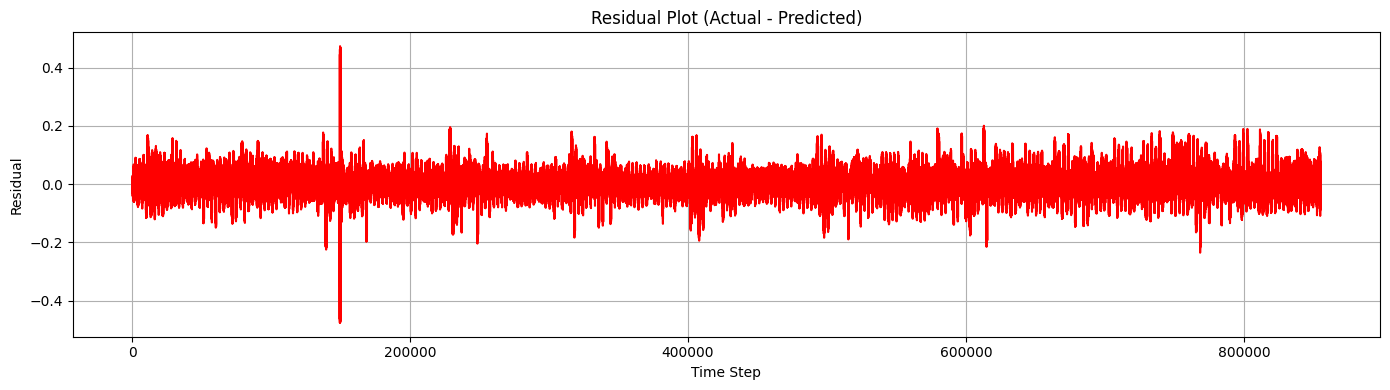

In [ ]:
# Residual Plot
# Check if the model error is biased (over/under-predict)
residuals = y_test.flatten() - y_pred_reg.flatten()

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


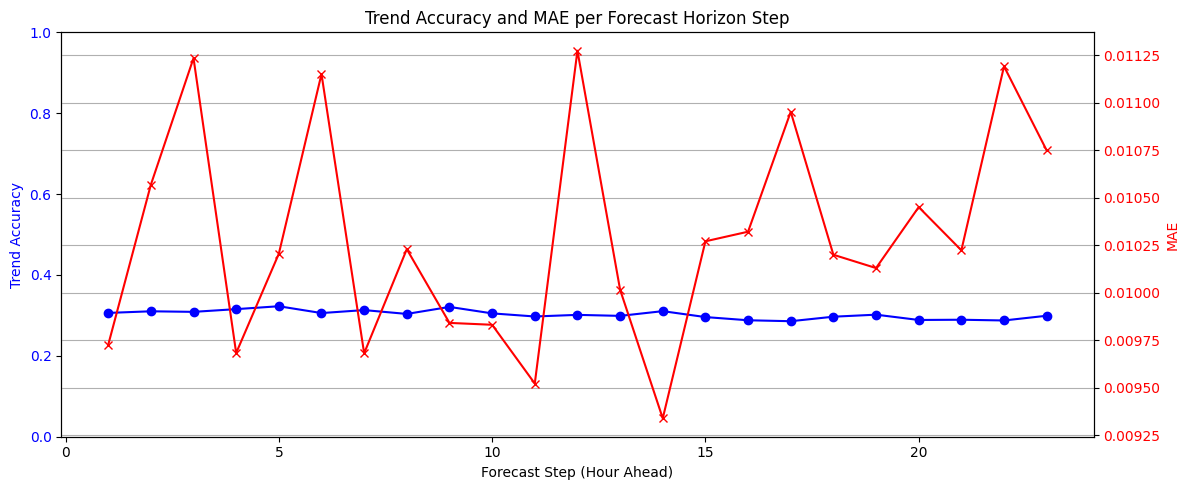

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_pred_reg, _ = model.predict(X_test)

trend_accuracies = []
step_maes = []
steps = range(1, y_test.shape[1])  # 1 to 23

for step in steps:
    actual_step = y_test[:, step]
    pred_step = y_pred_reg[:, step]

    # Trend accuracy
    actual_diff = actual_step - y_test[:, step - 1]
    pred_diff = pred_step - y_pred_reg[:, step - 1]
    match = np.sign(actual_diff) == np.sign(pred_diff)
    acc = np.mean(match)
    trend_accuracies.append(acc)

    # MAE for that step
    step_mae = np.mean(np.abs(actual_step - pred_step))
    step_maes.append(step_mae)

# Plot both on twin axes
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(steps, trend_accuracies, 'b-o', label='Trend Accuracy')
ax1.set_ylabel('Trend Accuracy', color='blue')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(steps, step_maes, 'r-x', label='MAE')
ax2.set_ylabel('MAE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Trend Accuracy and MAE per Forecast Horizon Step")
ax1.set_xlabel("Forecast Step (Hour Ahead)")
plt.grid(True)
plt.tight_layout()
plt.show()

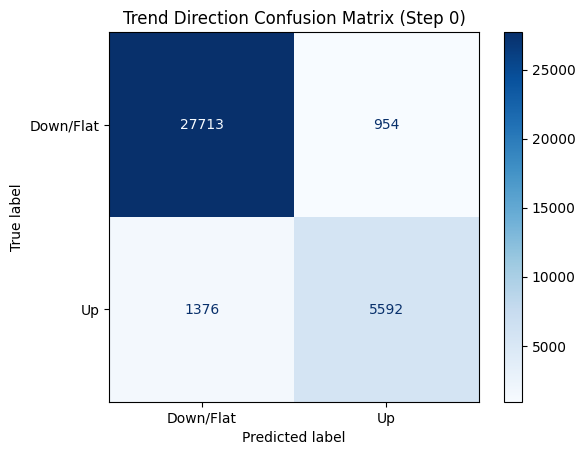

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_trend_test[:, 0], y_pred_trend_binary[:, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down/Flat", "Up"])
disp.plot(cmap="Blues")
plt.title("Trend Direction Confusion Matrix (Step 0)")
plt.show()

# **Additional Models**


```
"Total load actual" as a target variable
```





# 4.1.3.1 Conv1D + LSTM Model Architecture (total load actual – 30 hours)


---



In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Input shape from X_train
input_shape = X_train.shape[1:]

# Build the model
input_layer = Input(shape=X_train.shape[1:])
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.2)(x)
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = LSTM(32)(x)
x = Dropout(0.2)(x)
output = Dense(forecast_horizon)(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 30, 64)         │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 15, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,136 (195.84 KB)

 Trainable params: 50,136 (195.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 0.0265 - mae: 0.1109 - val_loss: 0.0042 - val_mae: 0.0485
Epoch 2/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0047 - mae: 0.0520 - val_loss: 0.0038 - val_mae: 0.0457
Epoch 3/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0037 - mae: 0.0459 - val_loss: 0.0031 - val_mae: 0.0405
Epoch 4/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0033 - mae: 0.0432 - val_loss: 0.0030 - val_mae: 0.0400
Epoch 5/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0031 - mae: 0.0418 - val_loss: 0.0027 - val_mae: 0.0376
Epoch 6/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0029 - mae: 0.0406 - val_loss: 0.0027 - val_mae: 0.0377
Epoch 7/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 0.0028 - mae: 0.0400 - val_loss: 0.0025 - val_mae: 0.0360
Epoch 8/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0027 - mae: 0.0390 - val_loss: 0.0028 - val_mae: 0.0383
Epoch 9/20
1784/1784 ━━━━━━

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

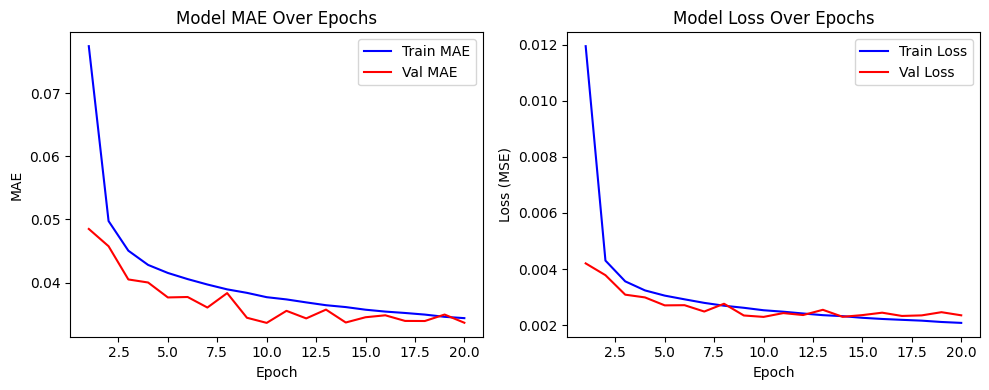

Test Loss (MSE): 0.0024
Test MAE: 0.0346


In [ ]:
epochs = range(1, len(mae) + 1)

# Plot MAE and Loss
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Model MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Model Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

1115/1115 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


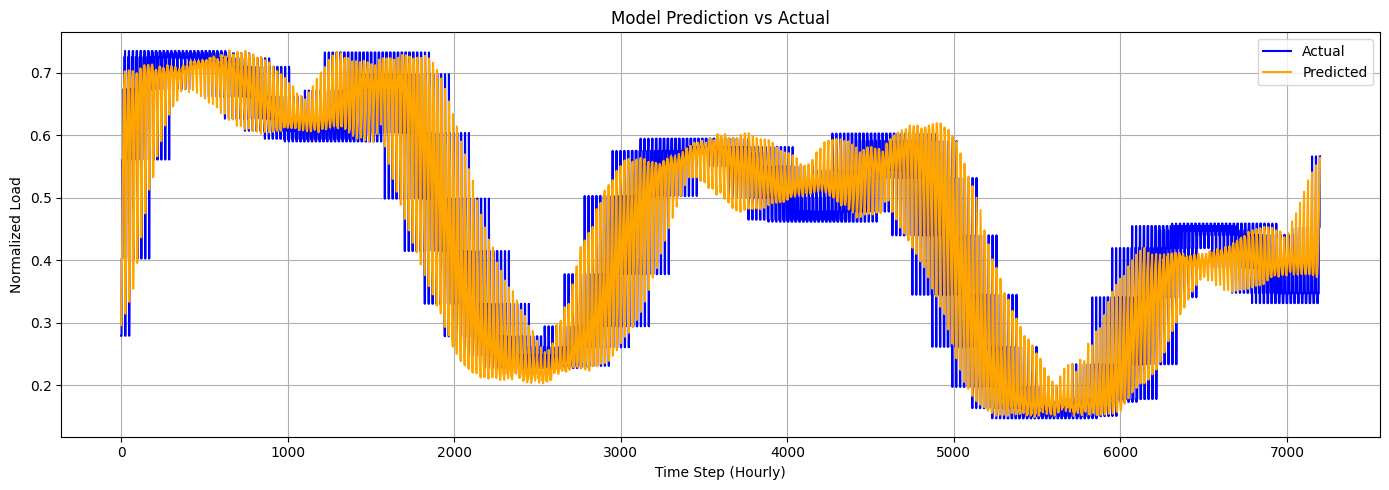

In [ ]:
# Overlay Line Plot (Predicted vs Actual)
# See how well the model follows the actual signal
y_pred = model.predict(X_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test[:300].flatten(), label='Actual', color='blue')
plt.plot(y_pred[:300].flatten(), label='Predicted', color='orange')
plt.title("Model Prediction vs Actual")
plt.xlabel("Time Step (Hourly)")
plt.ylabel("Normalized Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

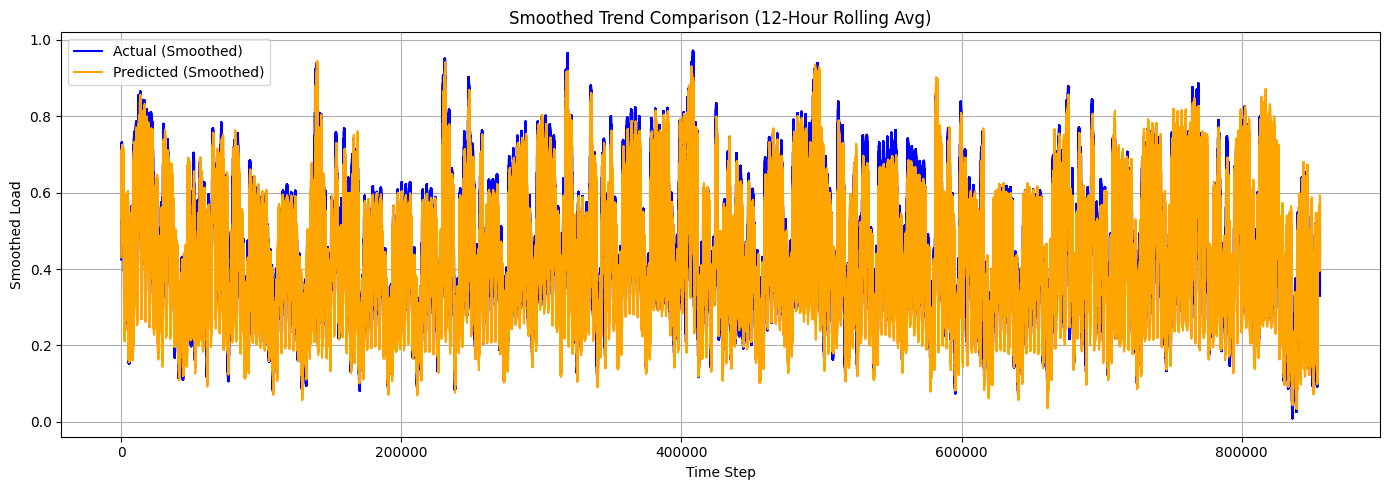

In [ ]:
# Smoothed Trends
# Visualize broader patterns, ignore noise
import pandas as pd

actual_smooth = pd.Series(y_test.flatten()).rolling(12).mean()
pred_smooth = pd.Series(y_pred.flatten()).rolling(12).mean()

plt.figure(figsize=(14, 5))
plt.plot(actual_smooth, label='Actual (Smoothed)', color='blue')
plt.plot(pred_smooth, label='Predicted (Smoothed)', color='orange')
plt.title("Smoothed Trend Comparison (12-Hour Rolling Avg)")
plt.xlabel("Time Step")
plt.ylabel("Smoothed Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Trend Direction Accuracy
# See if the model gets the up/down direction right
import numpy as np

actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred.flatten())

trend_match = np.sign(actual_diff) == np.sign(pred_diff)
accuracy = np.mean(trend_match)

print(f"Trend Direction Accuracy: {accuracy:.2%}")

Trend Direction Accuracy: 20.06%


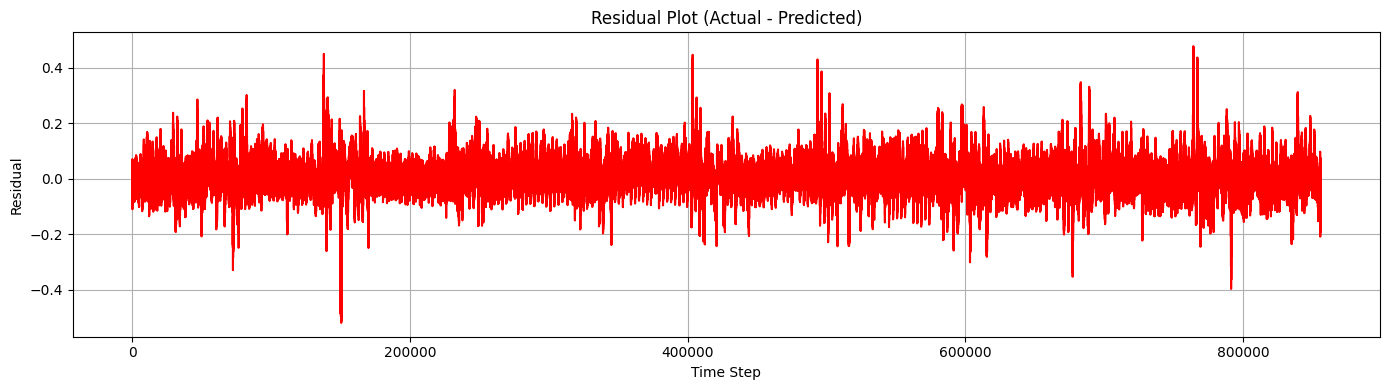

In [ ]:
# Residual Plot
# Check if the model error is biased (over/under-predict)
residuals = y_test.flatten() - y_pred.flatten()

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

Loss/MAE	✅ Good fit on training + test
Curve Matching	✅ Acceptable, tracks general trend
Short-Term Adaptability	❌ Weak — fails to catch quick changes
Trend Direction Accuracy	❌ Poor — model is reactive, not predictive
Residual Distribution	⚠️ Mostly OK, but some pattern hints missed

Model 2: Conv1D + LSTM
MAE: 0.0346

Trend Direction Accuracy: 20.06%

Strength: convolution for local pattern capture

Weakness: worse than basic LSTM — possibly over-smoothing from pooling

# 4.1.3.2 Conv1D + Bidirectional LSTM Model Architecture (total load actual – 30 hours)

---



In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, LSTM,
                                     Bidirectional, Dropout, Dense)
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))  # (30, 20)

x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Dropout(0.3)(x)

x = LSTM(32, return_sequences=False)(x)
x = Dropout(0.2)(x)

output = Dense(forecast_horizon)(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 30, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 30, 64)         │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 15, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 15, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,791 (354.65 KB)

 Trainable params: 90,791 (354.65 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - loss: 0.0141 - mae: 0.0824 - val_loss: 0.0017 - val_mae: 0.0313
Epoch 2/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 0.0027 - mae: 0.0396 - val_loss: 0.0017 - val_mae: 0.0314
Epoch 3/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0021 - mae: 0.0349 - val_loss: 0.0016 - val_mae: 0.0304
Epoch 4/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0019 - mae: 0.0333 - val_loss: 0.0014 - val_mae: 0.0278
Epoch 5/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - loss: 0.0018 - mae: 0.0323 - val_loss: 0.0012 - val_mae: 0.0262
Epoch 6/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.0017 - mae: 0.0314 - val_loss: 0.0012 - val_mae: 0.0249
Epoch 7/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0017 - mae: 0.0310 - val_loss: 0.0012 - val_mae: 0.0252
Epoch 8/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0016 - mae: 0.0303 - val_loss: 0.0010 - val_mae: 0.0235
Epoch 9/20
1784/1784 ━━━

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

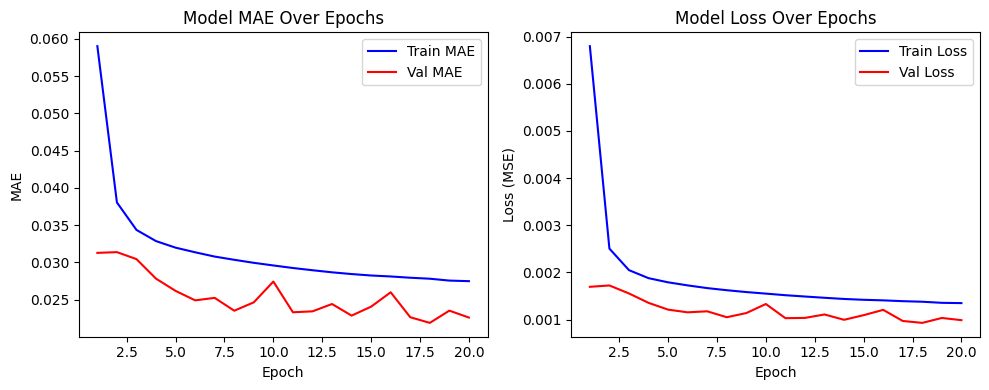

Test Loss (MSE): 0.0009
Test MAE: 0.0217


In [ ]:
epochs = range(1, len(mae) + 1)

# Plot MAE and Loss
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Model MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Model Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

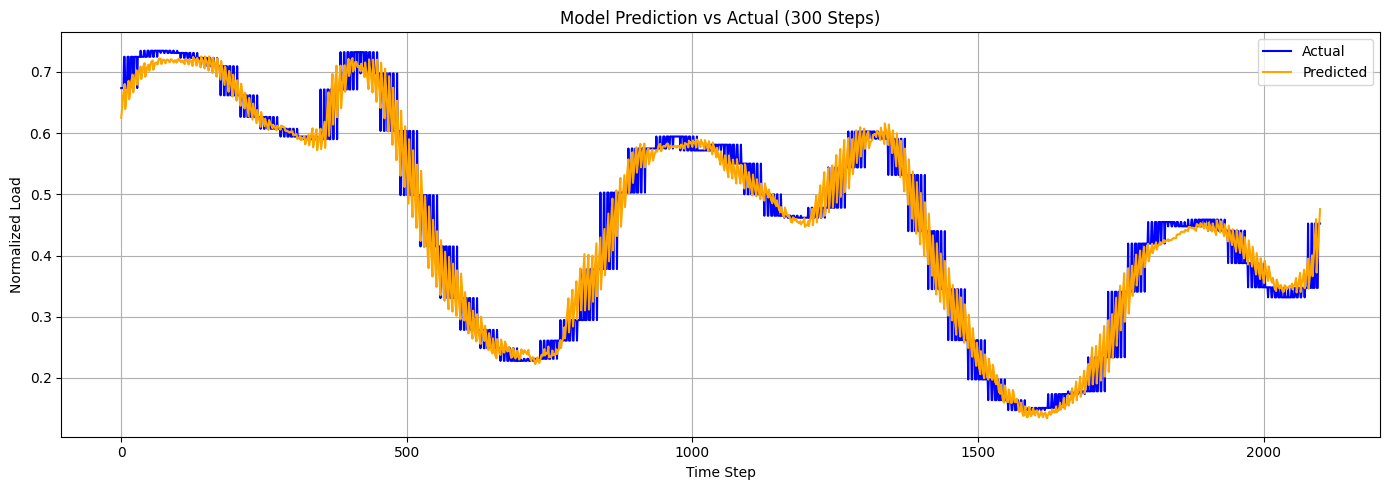

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(y_test[:300].flatten(), label='Actual', color='blue')
plt.plot(y_pred[:300].flatten(), label='Predicted', color='orange')
plt.title("Model Prediction vs Actual (300 Steps)")
plt.xlabel("Time Step")
plt.ylabel("Normalized Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

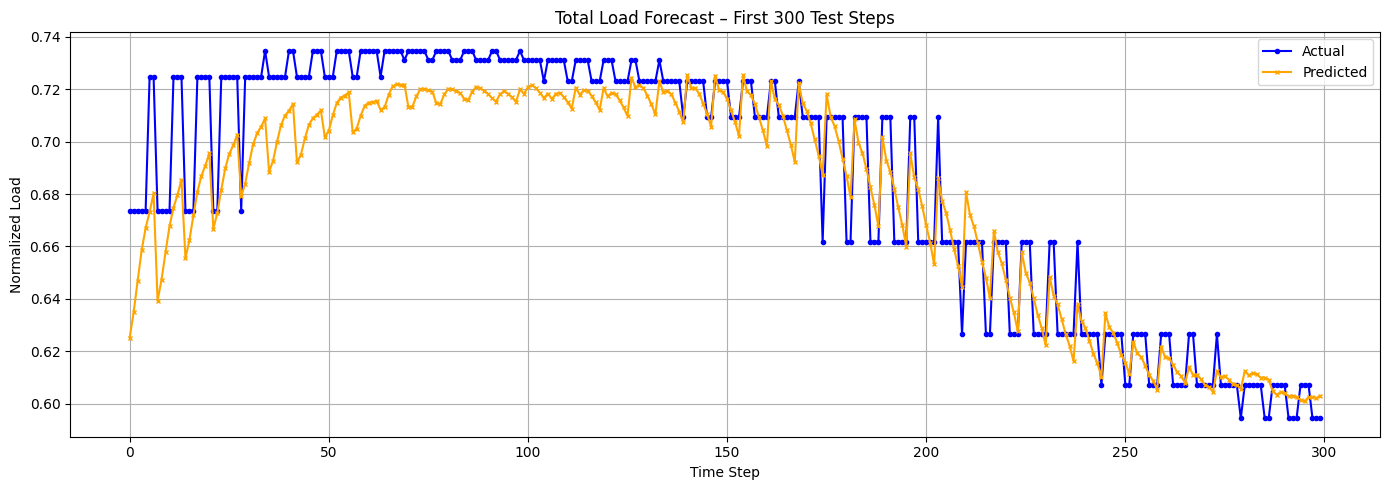

In [ ]:
import matplotlib.pyplot as plt

# Flatten and slice 300 test points
actual = y_test.flatten()[:300]
predicted = y_pred.flatten()[:300]

plt.figure(figsize=(14, 5))
plt.plot(actual, label='Actual', color='blue', marker='o', markersize=3)
plt.plot(predicted, label='Predicted', color='orange', marker='x', markersize=3)
plt.title("Total Load Forecast – First 300 Test Steps")
plt.xlabel("Time Step")
plt.ylabel("Normalized Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

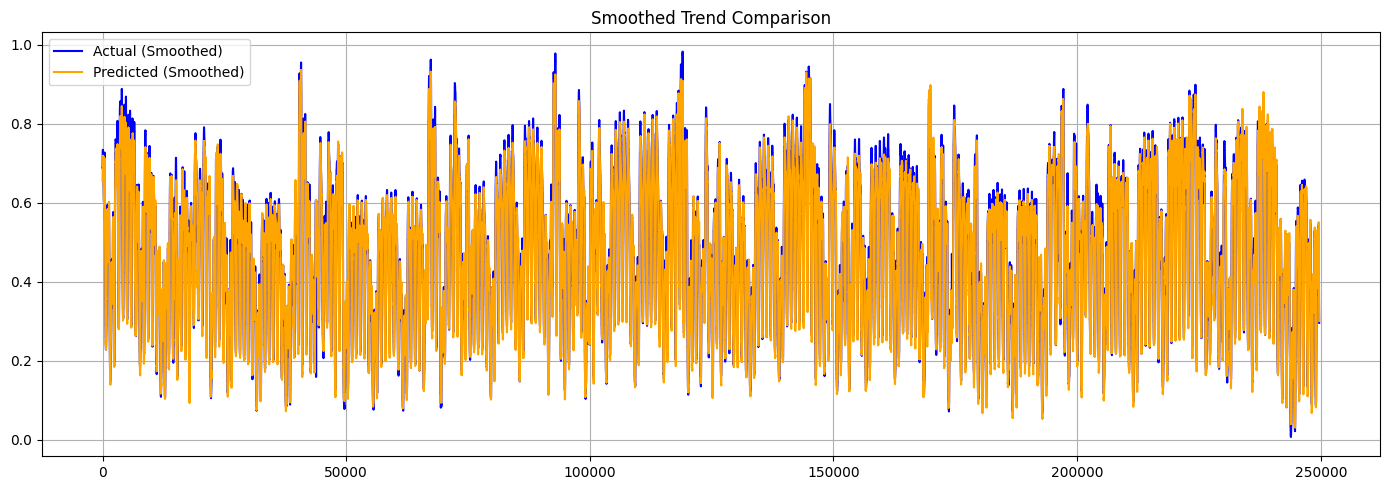

In [ ]:
import pandas as pd

actual_smooth = pd.Series(y_test.flatten()).rolling(7).mean()
pred_smooth = pd.Series(y_pred.flatten()).rolling(7).mean()

plt.figure(figsize=(14, 5))
plt.plot(actual_smooth, label='Actual (Smoothed)', color='blue')
plt.plot(pred_smooth, label='Predicted (Smoothed)', color='orange')
plt.title("Smoothed Trend Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# First differences
actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred.flatten())

# Sign match (1 if same direction, 0 otherwise)
trend_match = np.sign(actual_diff) == np.sign(pred_diff)
accuracy = np.mean(trend_match)

print(f"Trend direction accuracy: {accuracy:.2%}")

Trend direction accuracy: 27.12%


1115/1115 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


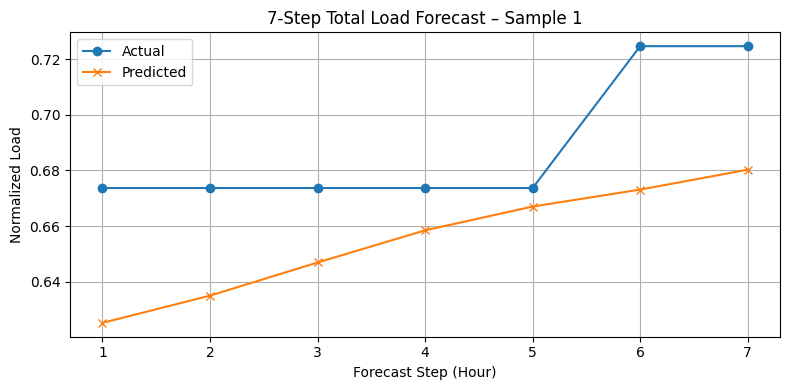

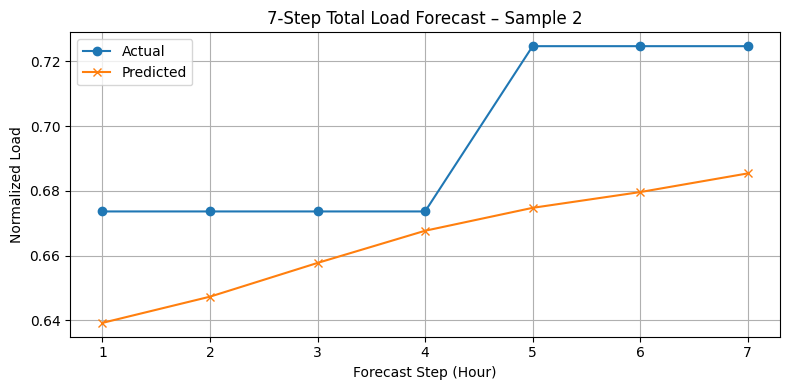

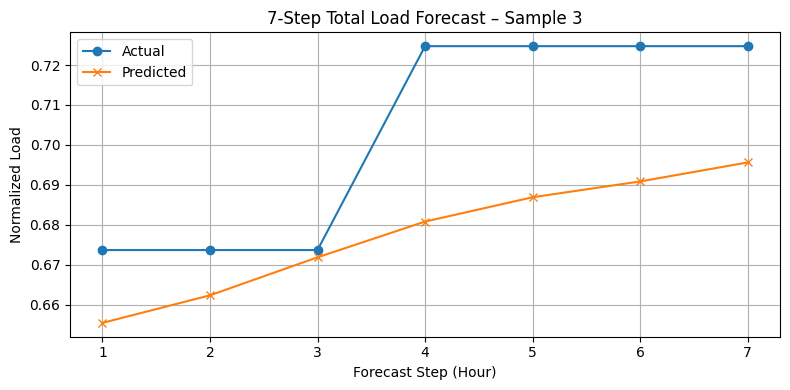

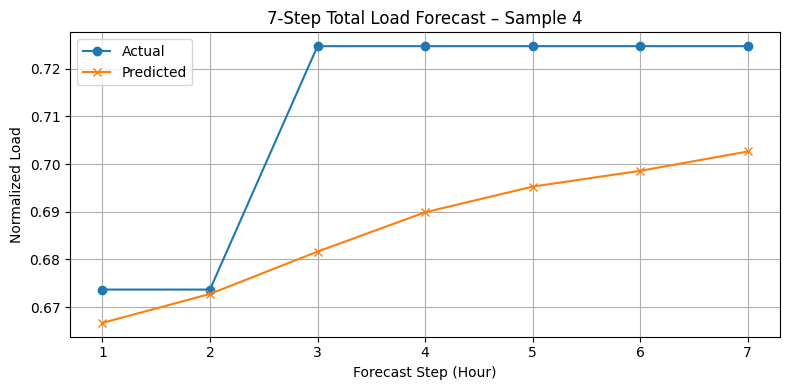

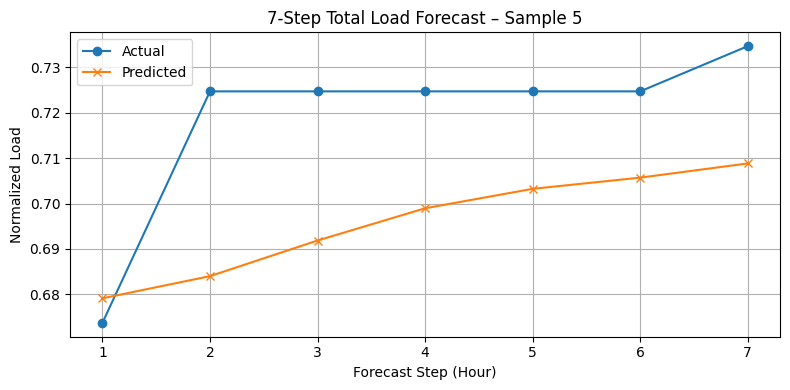

In [ ]:
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

# Plot 5 examples of 7-step prediction
for i in range(5):
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, forecast_horizon + 1), y_test[i], label='Actual', marker='o')
    plt.plot(range(1, forecast_horizon + 1), y_pred[i], label='Predicted', marker='x')
    plt.title(f'{forecast_horizon}-Step Total Load Forecast – Sample {i+1}')
    plt.xlabel('Forecast Step (Hour)')
    plt.ylabel('Normalized Load')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Model 3: Conv1D + Bidirectional LSTM
MAE: 0.0217

Trend Direction Accuracy: 27.12%

Strength: improved generalization

Weakness: still reactive, not predictive in direction

# CNN - 2nd Attempt (CNN + BiLSTM + Attention Architecture) + Huber + Target Variable total load actual - 24 Hours

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Bidirectional, LSTM, Attention, Concatenate, Dense
from tensorflow.keras.losses import Huber

input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Dropout(0.3)(x)

attn = Attention()([x, x])
x = Concatenate()([x, attn])

x = LSTM(32)(x)
x = Dropout(0.2)(x)

output = Dense(forecast_horizon)(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss=Huber(), metrics=['mae'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 30, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 30, 64)    │      5,440 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 15, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 15, 64)    │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 15, 128)   │     66,048 │ dropout_6[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 15, 128)   │          0 │ bidirectional_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_2         │ (None, 15, 128)   │          0 │ dropout_7[0][0],  │
│ (Attention)         │                   │            │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 15, 256)   │          0 │ dropout_7[0][0],  │
│ (Concatenate)       │                   │            │ attention_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 32)        │     36,992 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 32)        │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 24)        │        792 │ dropout_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 109,272 (426.84 KB)

 Trainable params: 109,272 (426.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.0109 - mae: 0.1029 - val_loss: 0.0018 - val_mae: 0.0435
Epoch 2/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0021 - mae: 0.0492 - val_loss: 0.0015 - val_mae: 0.0408
Epoch 3/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0017 - mae: 0.0439 - val_loss: 0.0014 - val_mae: 0.0393
Epoch 4/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0015 - mae: 0.0419 - val_loss: 0.0013 - val_mae: 0.0371
Epoch 5/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0015 - mae: 0.0406 - val_loss: 0.0013 - val_mae: 0.0381
Epoch 6/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0014 - mae: 0.0398 - val_loss: 0.0012 - val_mae: 0.0352
Epoch 7/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.0013 - mae: 0.0390 - val_loss: 0.0011 - val_mae: 0.0347
Epoch 8/20
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - loss: 0.0013 - mae: 0.0380 - val_loss: 0.0012 - val_mae: 0.0346
Epoch 9/20
1782/1782 ━━━

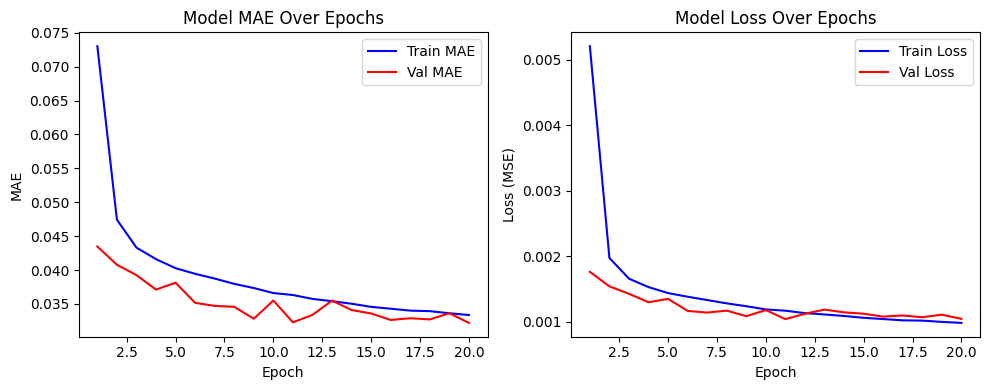

Test Loss (MSE): 0.0011
Test MAE: 0.0331


In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# Plot MAE and Loss
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Model MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Model Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


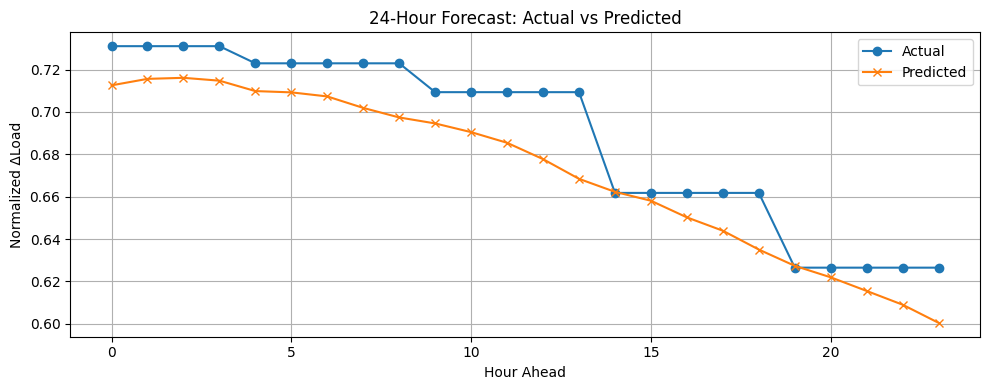

In [ ]:
# Overlay Line Plot (Predicted vs Actual)
# See how well the model follows the actual signal
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 4))
plt.plot(range(24), y_test[0], label='Actual', marker='o')
plt.plot(range(24), y_pred[0], label='Predicted', marker='x')
plt.title("24-Hour Forecast: Actual vs Predicted")
plt.xlabel("Hour Ahead")
plt.ylabel("Normalized ΔLoad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-48-91f9ac8da2b9>:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


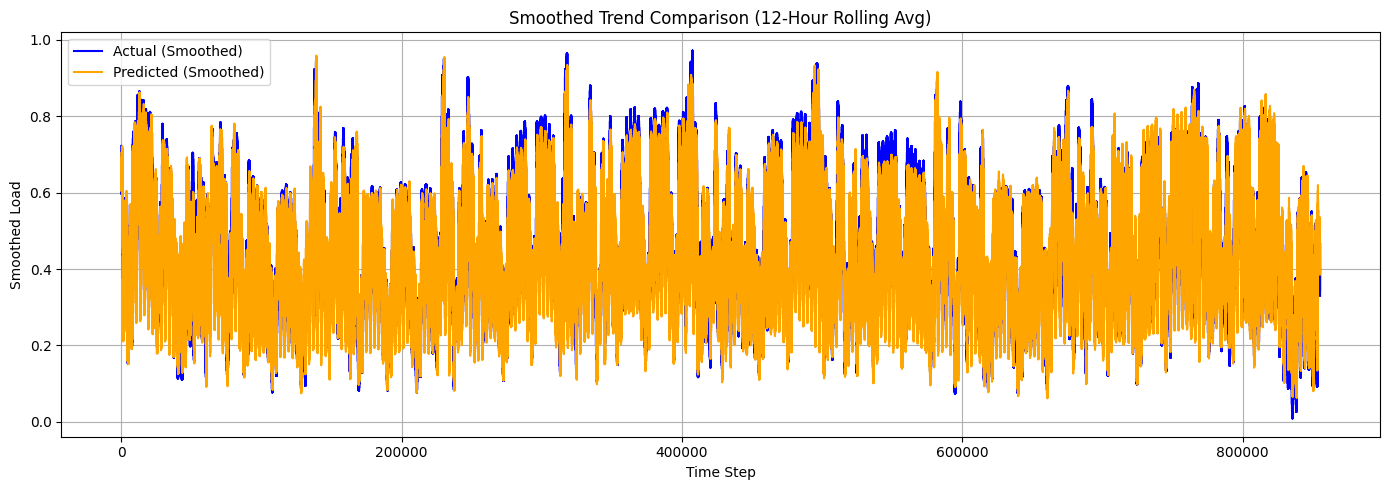

In [ ]:
# Smoothed Trends
# Visualize broader patterns, ignore noise
import pandas as pd

actual_smooth = pd.Series(y_test.flatten()).rolling(12).mean()
pred_smooth = pd.Series(y_pred.flatten()).rolling(12).mean()

plt.figure(figsize=(14, 5))
plt.plot(actual_smooth, label='Actual (Smoothed)', color='blue')
plt.plot(pred_smooth, label='Predicted (Smoothed)', color='orange')
plt.title("Smoothed Trend Comparison (12-Hour Rolling Avg)")
plt.xlabel("Time Step")
plt.ylabel("Smoothed Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Trend Direction Accuracy
# See if the model gets the up/down direction right
import numpy as np

actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred.flatten())

trend_match = np.sign(actual_diff) == np.sign(pred_diff)
accuracy = np.mean(trend_match)

print(f"Trend Direction Accuracy: {accuracy:.2%}")

Trend Direction Accuracy: 20.54%


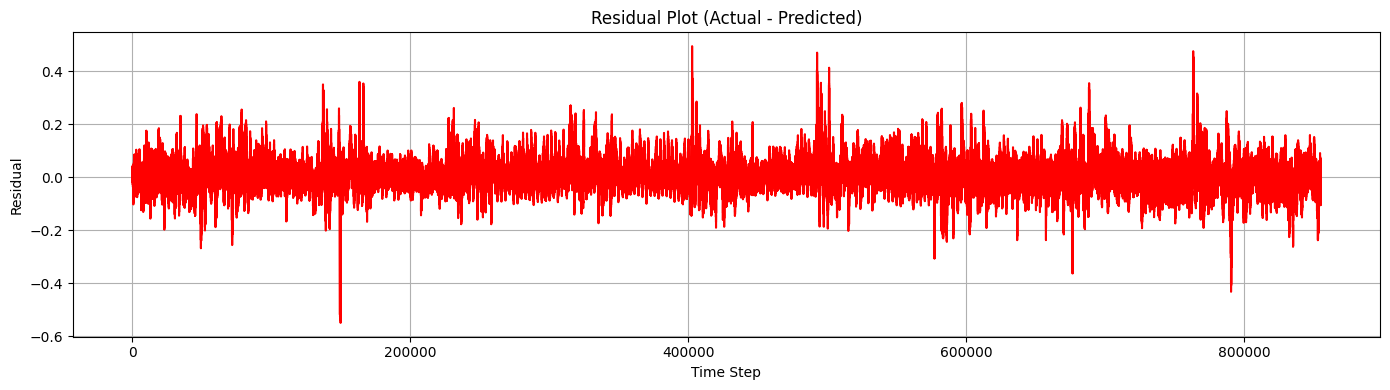

In [ ]:
# Residual Plot
# Check if the model error is biased (over/under-predict)
residuals = y_test.flatten() - y_pred.flatten()

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

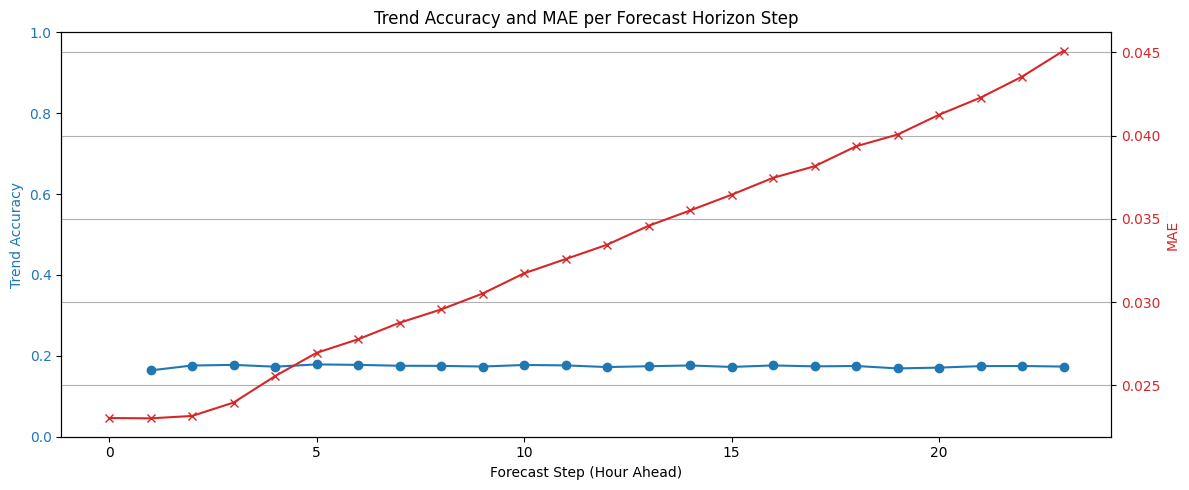

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Calculate Trend Accuracy per Forecast Step ---
trend_accuracies = []

for i in range(1, 24):  # From step 1 to 23 (we skip step 0 due to no previous value)
    actual_trend = np.sign(y_test[:, i] - y_test[:, i - 1])
    pred_trend = np.sign(y_pred[:, i] - y_pred[:, i - 1])
    accuracy = np.mean(actual_trend == pred_trend)
    trend_accuracies.append(accuracy)

# --- Calculate MAE per Forecast Step ---
mae_per_step = np.mean(np.abs(y_test - y_pred), axis=0)

# --- Plot Trend Accuracy and MAE ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Trend Accuracy
color = 'tab:blue'
ax1.set_xlabel('Forecast Step (Hour Ahead)')
ax1.set_ylabel('Trend Accuracy', color=color)
ax1.plot(range(1, 24), trend_accuracies, color=color, marker='o', label='Trend Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)

# Plot MAE (Right Y-axis)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MAE', color=color)
ax2.plot(range(24), mae_per_step, color=color, marker='x', label='MAE')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Trend Accuracy and MAE per Forecast Horizon Step")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Hyperturning**


```
For LSTM and CNN
```



# LSTM LSTM + Attention Model Hyperturning - 24 hours


---



In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.9 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Attention, Concatenate

def build_attn_lstm_model(hp):
    input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # First LSTM layer with tuning
    x = LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
             return_sequences=True)(input_layer)
    x = Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1))(x)

    # Attention block
    attn = Attention()([x, x])
    x = Concatenate()([x, attn])

    # Second LSTM layer with tuning
    x = LSTM(units=hp.Int('units_2', min_value=16, max_value=64, step=16))(x)
    x = Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1))(x)

    # Output layer
    output = Dense(forecast_horizon)(x)

    # Compile model
    model = Model(inputs=input_layer, outputs=output)
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )

    return model

In [ ]:
tuner = kt.RandomSearch(
    build_attn_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='attn_lstm_tuner_dir',
    project_name='attn_lstm_tuning'
)

In [ ]:
tuner.search(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

Trial 10 Complete [00h 06m 30s]
val_loss: 0.0004890834679827094

Best val_loss So Far: 0.0002690314140636474
Total elapsed time: 01h 02m 49s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Best Test MAE: {test_mae:.4f}")
print(f"Best Hyperparameters: {best_hps.values}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Test MAE: 0.0067
Best Hyperparameters: {'units_1': 128, 'dropout_1': 0.2, 'units_2': 64, 'dropout_2': 0.2}


In [ ]:
# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Rebuild the model using the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Retrain the model to get the history object
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0092 - mae: 0.0621 - val_loss: 4.9791e-04 - val_mae: 0.0128
Epoch 2/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 7.8675e-04 - mae: 0.0193 - val_loss: 4.7140e-04 - val_mae: 0.0119
Epoch 3/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 5.1832e-04 - mae: 0.0129 - val_loss: 4.6244e-04 - val_mae: 0.0122
Epoch 4/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 4.8742e-04 - mae: 0.0122 - val_loss: 4.5882e-04 - val_mae: 0.0122
Epoch 5/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 4.8187e-04 - mae: 0.0123 - val_loss: 4.5688e-04 - val_mae: 0.0119
Epoch 6/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 4.8347e-04 - mae: 0.0123 - val_loss: 4.5498e-04 - val_mae: 0.0122
Epoch 7/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 4.7921e-04 - mae: 0.0123 - val_loss: 4.5329e-04 - val_mae: 0.0120
Epoch 8/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 4.7709e-04 - mae: 0.0123 - val_l

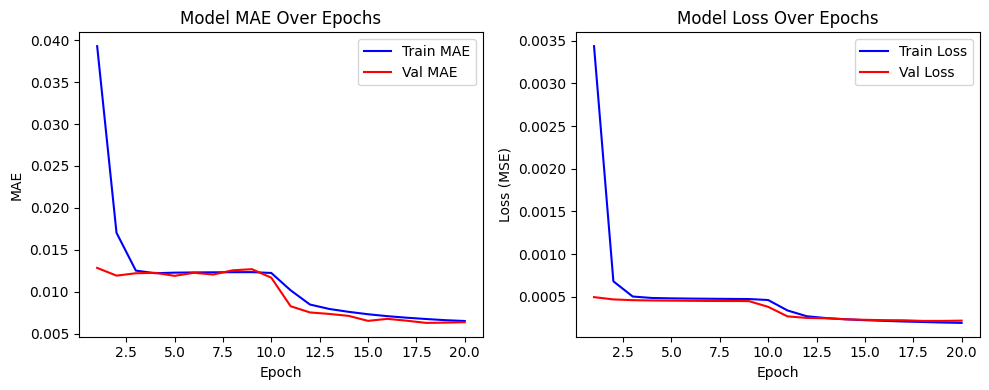

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics from history
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Model MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Model Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss (MSE): 0.0002
Test MAE: 0.0064


1114/1114 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


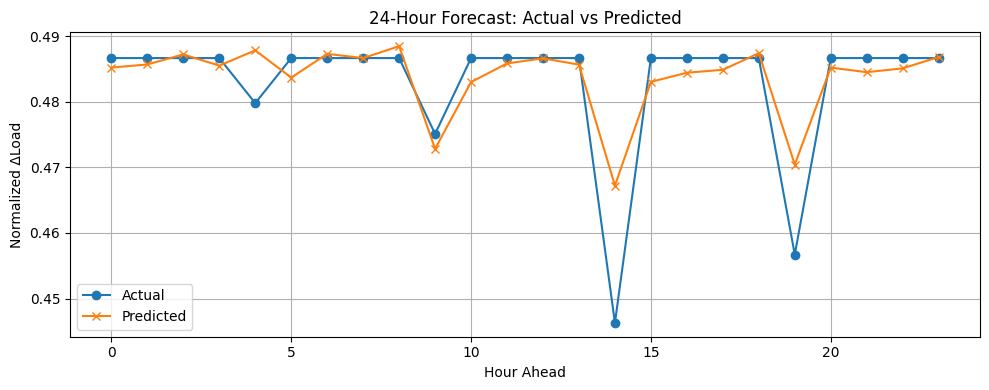

In [ ]:
# Overlay Line Plot (Predicted vs Actual)
# See how well the model follows the actual signal
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 4))
plt.plot(range(24), y_test[0], label='Actual', marker='o')
plt.plot(range(24), y_pred[0], label='Predicted', marker='x')
plt.title("24-Hour Forecast: Actual vs Predicted")
plt.xlabel("Hour Ahead")
plt.ylabel("Normalized ΔLoad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

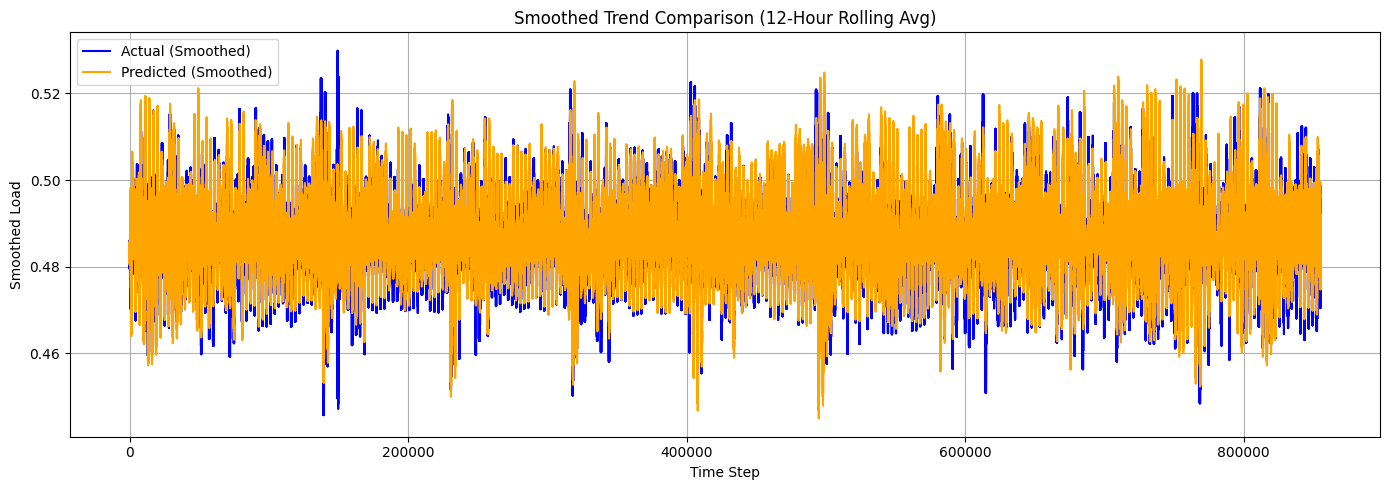

In [ ]:
# Smoothed Trends
# Visualize broader patterns, ignore noise
import pandas as pd

actual_smooth = pd.Series(y_test.flatten()).rolling(12).mean()
pred_smooth = pd.Series(y_pred.flatten()).rolling(12).mean()

plt.figure(figsize=(14, 5))
plt.plot(actual_smooth, label='Actual (Smoothed)', color='blue')
plt.plot(pred_smooth, label='Predicted (Smoothed)', color='orange')
plt.title("Smoothed Trend Comparison (12-Hour Rolling Avg)")
plt.xlabel("Time Step")
plt.ylabel("Smoothed Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Trend Direction Accuracy
# See if the model gets the up/down direction right
import numpy as np

actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred.flatten())

trend_match = np.sign(actual_diff) == np.sign(pred_diff)
accuracy = np.mean(trend_match)

print(f"Trend Direction Accuracy: {accuracy:.2%}")

Trend Direction Accuracy: 31.36%


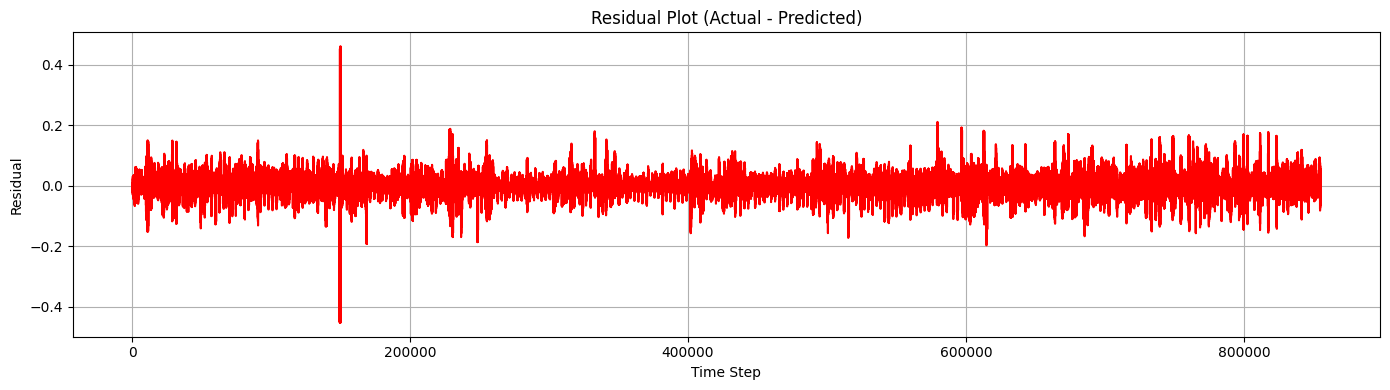

In [ ]:
# Residual Plot
# Check if the model error is biased (over/under-predict)
residuals = y_test.flatten() - y_pred.flatten()

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

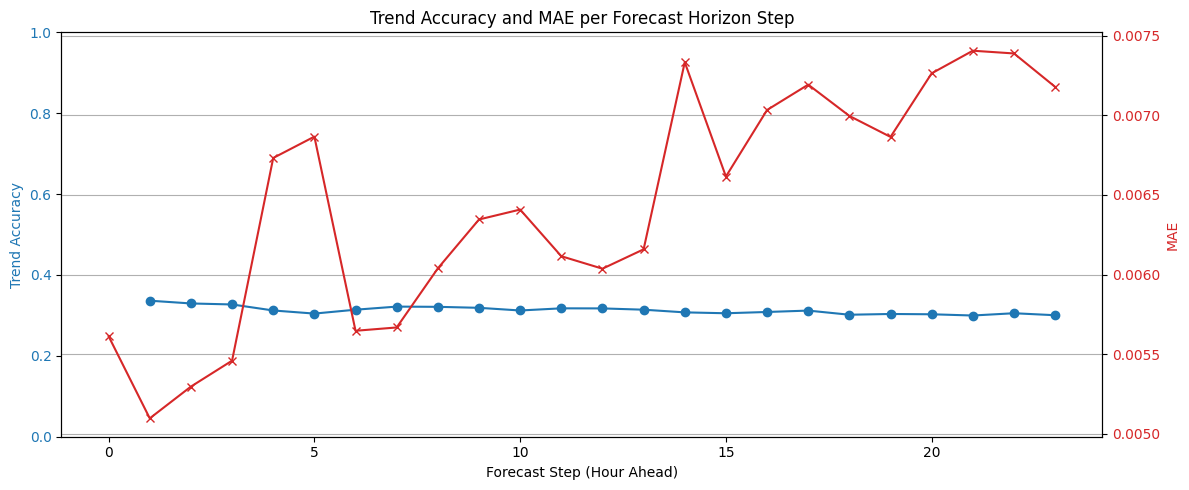

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Calculate Trend Accuracy per Forecast Step ---
trend_accuracies = []

for i in range(1, 24):  # From step 1 to 23 (we skip step 0 due to no previous value)
    actual_trend = np.sign(y_test[:, i] - y_test[:, i - 1])
    pred_trend = np.sign(y_pred[:, i] - y_pred[:, i - 1])
    accuracy = np.mean(actual_trend == pred_trend)
    trend_accuracies.append(accuracy)

# --- Calculate MAE per Forecast Step ---
mae_per_step = np.mean(np.abs(y_test - y_pred), axis=0)

# --- Plot Trend Accuracy and MAE ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Trend Accuracy
color = 'tab:blue'
ax1.set_xlabel('Forecast Step (Hour Ahead)')
ax1.set_ylabel('Trend Accuracy', color=color)
ax1.plot(range(1, 24), trend_accuracies, color=color, marker='o', label='Trend Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)

# Plot MAE (Right Y-axis)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MAE', color=color)
ax2.plot(range(24), mae_per_step, color=color, marker='x', label='MAE')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Trend Accuracy and MAE per Forecast Horizon Step")
plt.grid(True)
plt.tight_layout()
plt.show()

# (CNN + BiLSTM + Attention Architecture) Model Hypertuning - 24 Hours


---



In [ ]:
import optuna
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

def create_model(trial):
    lstm_units = trial.suggest_int('lstm_units', 32, 128)
    dropout_rate = trial.suggest_float('dropout', 0.1, 0.5)
    learning_rate = trial.suggest_float('lr', 1e-4, 5e-3, log=True)

    input_layer = Input(shape=(30, X_train.shape[2]))

    x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(dropout_rate)(x)

    x = Bidirectional(LSTM(lstm_units, return_sequences=True))(x)
    x = Dropout(dropout_rate)(x)

    attn = Attention()([x, x])
    x = Concatenate()([x, attn])

    x = LSTM(32)(x)
    x = Dropout(dropout_rate)(x)

    output = Dense(24)(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=Huber(), metrics=['mae'])
    return model

def objective(trial):
    model = create_model(trial)
    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=10, batch_size=64, verbose=0)
    loss, mae = model.evaluate(X_val, y_val, verbose=0)
    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

print("Best hyperparameters:", study.best_params)

[I 2025-05-11 15:32:41,703] A new study created in memory with name: no-name-613e750a-0e71-43fc-9f6f-9649edbd43ad
[I 2025-05-11 15:36:09,096] Trial 0 finished with value: 0.012135516852140427 and parameters: {'lstm_units': 114, 'dropout': 0.14568015486825306, 'lr': 0.00018717309506049396}. Best is trial 0 with value: 0.012135516852140427.
[I 2025-05-11 15:40:09,312] Trial 1 finished with value: 0.00743984105065465 and parameters: {'lstm_units': 96, 'dropout': 0.34249125577000805, 'lr': 0.004903031851838023}. Best is trial 1 with value: 0.00743984105065465.
[I 2025-05-11 15:44:00,581] Trial 2 finished with value: 0.01185570564121008 and parameters: {'lstm_units': 51, 'dropout': 0.3571751021862203, 'lr': 0.0007959612059781011}. Best is trial 1 with value: 0.00743984105065465.
[I 2025-05-11 15:47:30,563] Trial 3 finished with value: 0.01157538965344429 and parameters: {'lstm_units': 47, 'dropout': 0.498228004349317, 'lr': 0.0016876681383421468}. Best is trial 1 with value: 0.0074398410506

Best hyperparameters: {'lstm_units': 34, 'dropout': 0.10454715541745044, 'lr': 0.0030677904899323984}


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Bidirectional, LSTM, Attention, Concatenate, Dense
from tensorflow.keras.losses import Huber

best_params = study.best_params

def build_final_model():
    input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

    x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(best_params['dropout'])(x)

    x = Bidirectional(LSTM(best_params['lstm_units'], return_sequences=True))(x)
    x = Dropout(best_params['dropout'])(x)

    attn = Attention()([x, x])
    x = Concatenate()([x, attn])

    x = LSTM(32)(x)
    x = Dropout(best_params['dropout'])(x)

    output = Dense(24)(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=best_params['lr']),
                  loss='mse',
                  metrics=['mae'])
    return model

model = build_final_model()

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 0.0069 - mae: 0.0474 - val_loss: 4.7186e-04 - val_mae: 0.0120
Epoch 2/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 5.2524e-04 - mae: 0.0131 - val_loss: 4.6439e-04 - val_mae: 0.0125
Epoch 3/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 4.8995e-04 - mae: 0.0122 - val_loss: 4.6111e-04 - val_mae: 0.0123
Epoch 4/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - loss: 4.8471e-04 - mae: 0.0123 - val_loss: 4.6075e-04 - val_mae: 0.0128
Epoch 5/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 4.8066e-04 - mae: 0.0123 - val_loss: 4.5545e-04 - val_mae: 0.0119
Epoch 6/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 4.7590e-04 - mae: 0.0123 - val_loss: 4.3083e-04 - val_mae: 0.0116
Epoch 7/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 4.5018e-04 - mae: 0.0118 - val_loss: 2.7762e-04 - val_mae: 0.0083
Epoch 8/20
1671/1671 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 2.8026e-04 - mae: 0.0081 - val

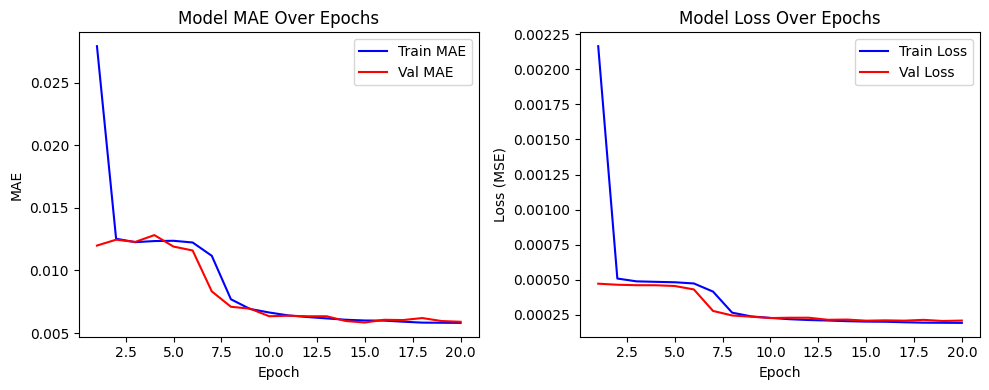

Test Loss (MSE): 0.0002
Test MAE: 0.0061


In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# Plot MAE and Loss
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# MAE plot
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Val MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Model MAE Over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Model Loss Over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


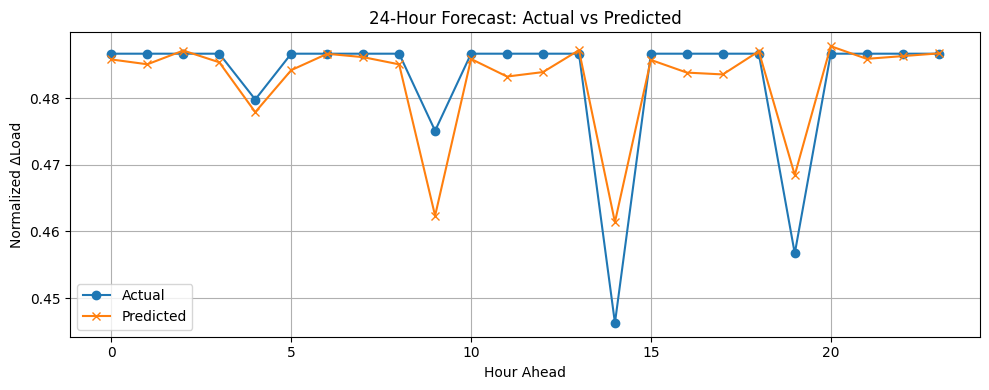

In [ ]:
# Overlay Line Plot (Predicted vs Actual)
# See how well the model follows the actual signal
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 4))
plt.plot(range(24), y_test[0], label='Actual', marker='o')
plt.plot(range(24), y_pred[0], label='Predicted', marker='x')
plt.title("24-Hour Forecast: Actual vs Predicted")
plt.xlabel("Hour Ahead")
plt.ylabel("Normalized ΔLoad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

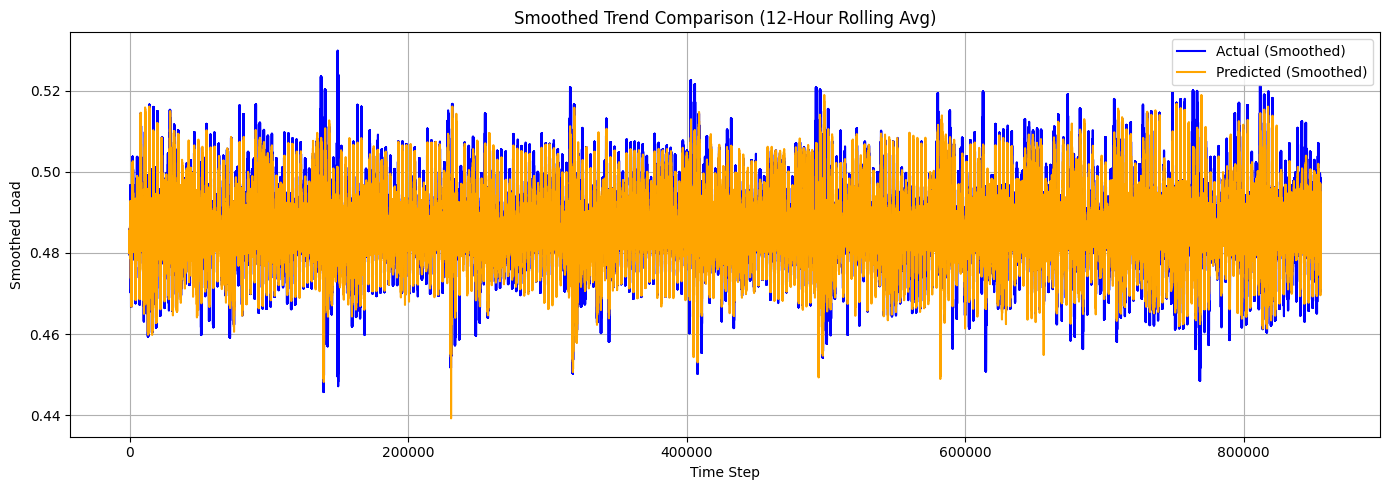

In [ ]:
# Smoothed Trends
# Visualize broader patterns, ignore noise
import pandas as pd

actual_smooth = pd.Series(y_test.flatten()).rolling(12).mean()
pred_smooth = pd.Series(y_pred.flatten()).rolling(12).mean()

plt.figure(figsize=(14, 5))
plt.plot(actual_smooth, label='Actual (Smoothed)', color='blue')
plt.plot(pred_smooth, label='Predicted (Smoothed)', color='orange')
plt.title("Smoothed Trend Comparison (12-Hour Rolling Avg)")
plt.xlabel("Time Step")
plt.ylabel("Smoothed Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Trend Direction Accuracy
# See if the model gets the up/down direction right
import numpy as np

actual_diff = np.diff(y_test.flatten())
pred_diff = np.diff(y_pred.flatten())

trend_match = np.sign(actual_diff) == np.sign(pred_diff)
accuracy = np.mean(trend_match)

print(f"Trend Direction Accuracy: {accuracy:.2%}")

Trend Direction Accuracy: 31.80%


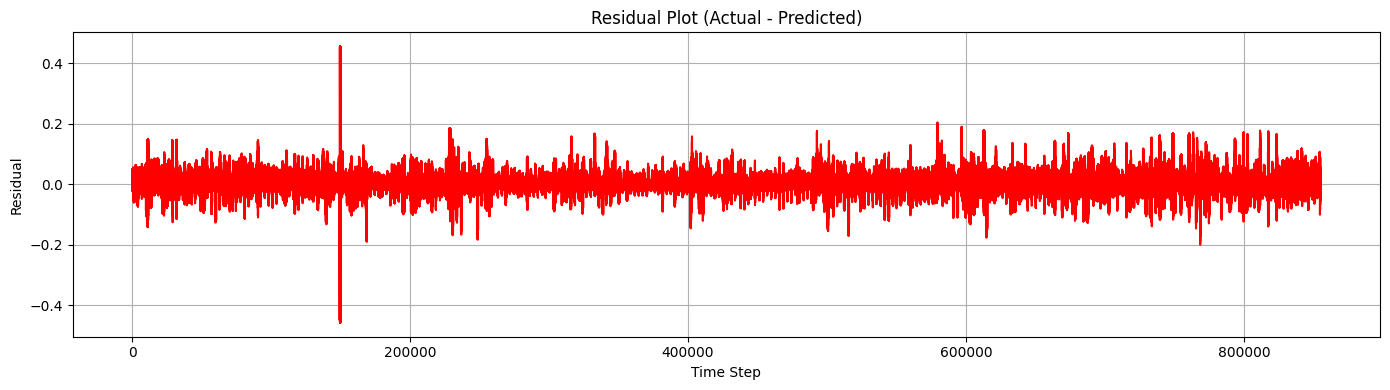

In [ ]:
# Residual Plot
# Check if the model error is biased (over/under-predict)
residuals = y_test.flatten() - y_pred.flatten()

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

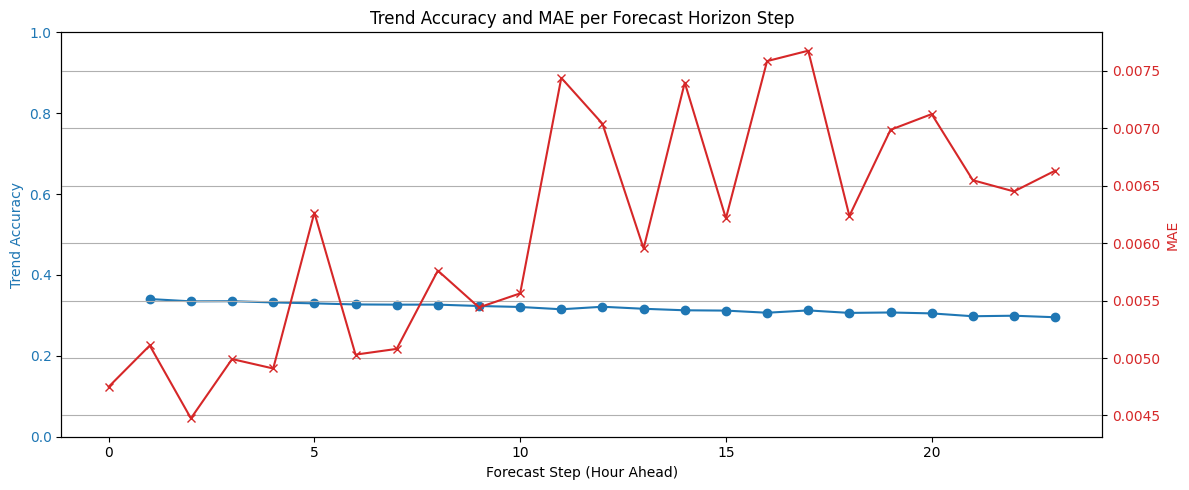

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Calculate Trend Accuracy per Forecast Step ---
trend_accuracies = []

for i in range(1, 24):  # From step 1 to 23 (we skip step 0 due to no previous value)
    actual_trend = np.sign(y_test[:, i] - y_test[:, i - 1])
    pred_trend = np.sign(y_pred[:, i] - y_pred[:, i - 1])
    accuracy = np.mean(actual_trend == pred_trend)
    trend_accuracies.append(accuracy)

# --- Calculate MAE per Forecast Step ---
mae_per_step = np.mean(np.abs(y_test - y_pred), axis=0)

# --- Plot Trend Accuracy and MAE ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Trend Accuracy
color = 'tab:blue'
ax1.set_xlabel('Forecast Step (Hour Ahead)')
ax1.set_ylabel('Trend Accuracy', color=color)
ax1.plot(range(1, 24), trend_accuracies, color=color, marker='o', label='Trend Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)

# Plot MAE (Right Y-axis)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MAE', color=color)
ax2.plot(range(24), mae_per_step, color=color, marker='x', label='MAE')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Trend Accuracy and MAE per Forecast Horizon Step")
plt.grid(True)
plt.tight_layout()
plt.show()